In [1]:
import prepare
import env
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
import model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import explained_variance_score
import sklearn.metrics

# Acquire

In [2]:
zillow = pd.read_csv("zillow_data.csv")

# Prepare

In [3]:
zillow = prepare.drop_null_col(zillow)

In [4]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 35 columns):
Unnamed: 0                      77575 non-null int64
heatingorsystemtypeid           49570 non-null float64
propertylandusetypeid           77575 non-null float64
parcelid                        77575 non-null int64
id                              77575 non-null int64
bathroomcnt                     77575 non-null float64
bedroomcnt                      77575 non-null float64
buildingqualitytypeid           49809 non-null float64
calculatedbathnbr               76960 non-null float64
calculatedfinishedsquarefeet    77375 non-null float64
finishedsquarefeet12            73920 non-null float64
fips                            77575 non-null float64
fullbathcnt                     76960 non-null float64
latitude                        77575 non-null float64
longitude                       77575 non-null float64
lotsizesquarefeet               69318 non-null float64
propertycountylan

In [5]:
col_obj = ["heatingorsystemtypeid", "parcelid", "id", "fips", "latitude", "longitude", "yearbuilt", "assessmentyear", "censustractandblock", "regionidcity", "regionidzip", "regionidcounty", "propertylandusetypeid"]

zillow[col_obj] = prepare.change_dtypes(zillow, col_obj, "object")

In [6]:
zillow = prepare.impude_values(zillow)

In [7]:
col_drop = ["propertyzoningdesc", "heatingorsystemtypeid", "calculatedbathnbr", "fullbathcnt", "Unnamed: 0"]

zillow.drop(columns = col_drop)

propertylandusetypeid   parcelid       id  bathroomcnt  bedroomcnt  \
0                       261   10711855  1087254          2.0         3.0   
1                       261   10711877  1072280          2.0         4.0   
2                       261   10711888  1340933          2.0         4.0   
3                       261   10711910  1878109          2.0         3.0   
4                       261   10711923  2190858          2.0         4.0   
...                     ...        ...      ...          ...         ...   
77569                   266  167655959   179190          3.0         3.0   
77570                   261  167686999   775695          0.0         0.0   
77571                   266  167687739  2863262          0.0         0.0   
77572                   261  167687839  1372384          0.0         0.0   
77573                   266  167688532  2758757          3.0         3.0   

       buildingqualitytypeid  calculatedfinishedsquarefeet  \
0                        8.0                        2107.0   
1                        8.0                        1882.0   
2                        8.0                        1882.0   
3                        8.0                        1477.0   
4                        8.0                        1918.0   
...                      ...                           ...   
77569                    4.0                        1861.0   
77570                    8.0                        1523.0   
77571                    8.0                        1523.0   
77572                    8.0                        1523.0   
77573                    4.0                        1661.0   

       finishedsquarefeet12  fips     latitude  ...  \
0                    2107.0  6037  3.42226e+07  ...   
1                    1882.0  6037  3.42203e+07  ...   
2                    1882.0  6037  3.42225e+07  ...   
3                    1477.0  6037  3.42219e+07  ...   
4                    1918.0  6037  3.42206e+07  ...   
...                     ...   ...          ...  ...   
77569                1861.0  6037  3.39151e+07  ...   
77570                1524.0  6037  3.44241e+07  ...   
77571                1524.0  6037  3.40417e+07  ...   
77572                1524.0  6037  3.40482e+07  ...   
77573                1661.0  6037   3.4109e+07  ...   

      structuretaxvaluedollarcnt  taxvaluedollarcnt assessmentyear  \
0                       249655.0           624139.0           2016   
1                       253000.0           660000.0           2016   
2                       257591.0           542923.0           2016   
3                        57968.0            78031.0           2016   
4                       167869.0           415459.0           2016   
...                          ...                ...            ...   
77569                   359195.0          1044387.0           2016   
77570                        NaN            26405.0           2016   
77571                  5451600.0          6440197.0           2016   
77572                        NaN          1842678.0           2016   
77573                        NaN           147921.0           2016   

       landtaxvaluedollarcnt  taxamount censustractandblock  logerror  \
0                   374484.0    7659.36        6.037113e+13 -0.007357   
1                   407000.0    8123.91        6.037113e+13  0.021066   
2                   285332.0    6673.24        6.037113e+13  0.077174   
3                    20063.0    1116.46        6.037113e+13 -0.041238   
4                   247590.0    5239.85        6.037113e+13 -0.009496   
...                      ...        ...                 ...       ...   
77569               685192.0   14424.81        6.037137e+13 -0.130756   
77570                26405.0     988.48        6.037137e+13 -0.068632   
77571               988597.0   77045.13        6.037137e+13  0.360020   
77572              1842678.0   22045.81        6.037137e+13  0.038797   
77573               147921.0    1902.75    

In [8]:
zillow.fips.value_counts()

6037.0    47640
6059.0    20400
6111.0     5771
Name: fips, dtype: int64

In [9]:
zillow = prepare.wrangle_zillow()

In [10]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53746 entries, 0 to 53745
Data columns (total 32 columns):
propertylandusetypeid           53746 non-null object
parcelid                        53746 non-null object
id                              53746 non-null object
bathroomcnt                     53746 non-null float64
bedroomcnt                      53746 non-null float64
buildingqualitytypeid           53746 non-null float64
calculatedfinishedsquarefeet    53746 non-null float64
finishedsquarefeet12            53746 non-null float64
fips                            53746 non-null int64
latitude                        53746 non-null object
longitude                       53746 non-null object
lotsizesquarefeet               53746 non-null float64
propertycountylandusecode       53746 non-null object
rawcensustractandblock          53746 non-null float64
regionidcity                    53746 non-null float64
regionidcounty                  53746 non-null object
regionidzip         

In [11]:
zillow.dropna().fips.value_counts()

6037    33212
6059    15830
6111     4704
Name: fips, dtype: int64

In [12]:
zillow.shape

(53746, 32)

In [13]:
# zillow.to_csv("zillow_prep_data.csv")

# Feature Engineering

A couple of features that I want to create:

* Total Room Count (bedrooms + bathrooms)
* Age of Home (2017 - year built)
* Value Ratio (parcel tax ÷ property tax).

I also want to see if the log error changes based on:

* location
* when the house was built
* size

In [14]:
# Create a new "age_home"

zillow["age_home"] = 2017 - zillow.yearbuilt

In [15]:
# total_property_size (combine calculated square feet of the house plus the size of the lot)

zillow["total_size"] = zillow.finishedsquarefeet12 + zillow.lotsizesquarefeet

In [16]:
# value_ratio = qhat is the rate between home tax and property tax
zillow["value_ratio"] = zillow.landtaxvaluedollarcnt / zillow.taxamount

In [17]:
# What the tax rate is 

zillow["tax_rate"] = zillow.taxamount / zillow.taxvaluedollarcnt

# Scaling

In [18]:
zillow_unscaled = zillow

In [19]:
df_scaling = zillow.select_dtypes(exclude="object")

In [20]:
scaler, df_scaled = prepare.min_max_scaler_explore(df_scaling)

In [21]:
df_object = zillow.select_dtypes("object")

In [22]:
zillow = pd.concat([df_object, df_scaled], axis=1)

# Explore

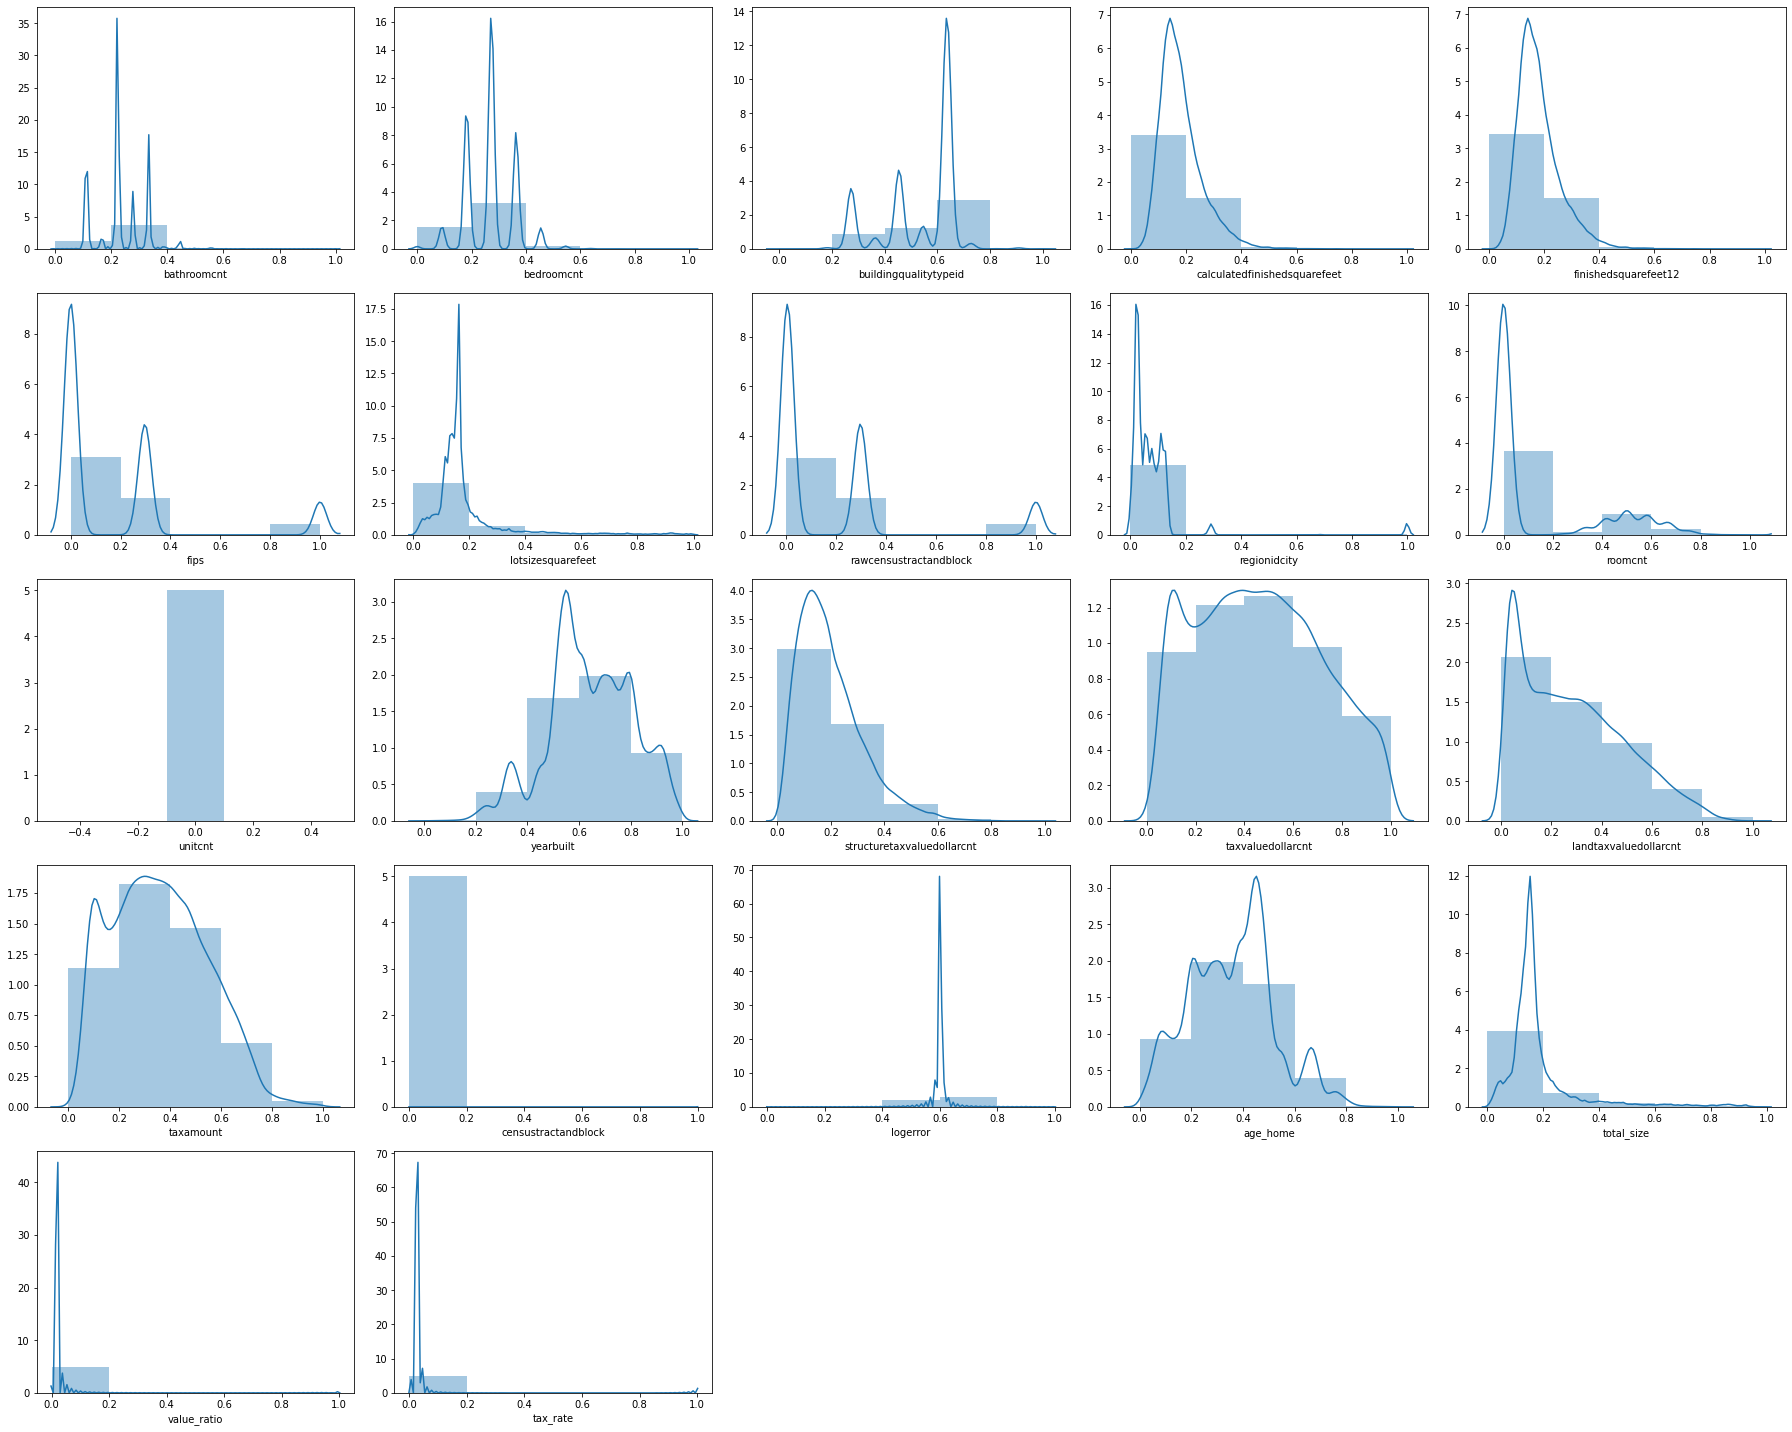

In [23]:
# How is the data distributed?

continuious = zillow.select_dtypes("number")
f = plt.figure(figsize=(25,20))
for i in range(continuious.shape[1]):
    f.add_subplot(5,5, i+1)
    sns.distplot(continuious.iloc[:,i], bins=5)
plt.tight_layout()
plt.show()
    

In [24]:
# We will begin by clustering the target variable - then comparing it to other variables to see if there is a pattern.

zillow, centroid = model.create_cluster(zillow, 5, ["logerror"], "logerror_cluster")
zillow.logerror_cluster.value_counts()

cluster_1    47467
cluster_5     3565
cluster_2     2534
cluster_3      144
cluster_4       36
Name: logerror_cluster, dtype: int64

We can see that cluster_3 and cluster_4 more likely refers to the outliers, while cluster_1 and cluster_2 holds the bulks of the data.

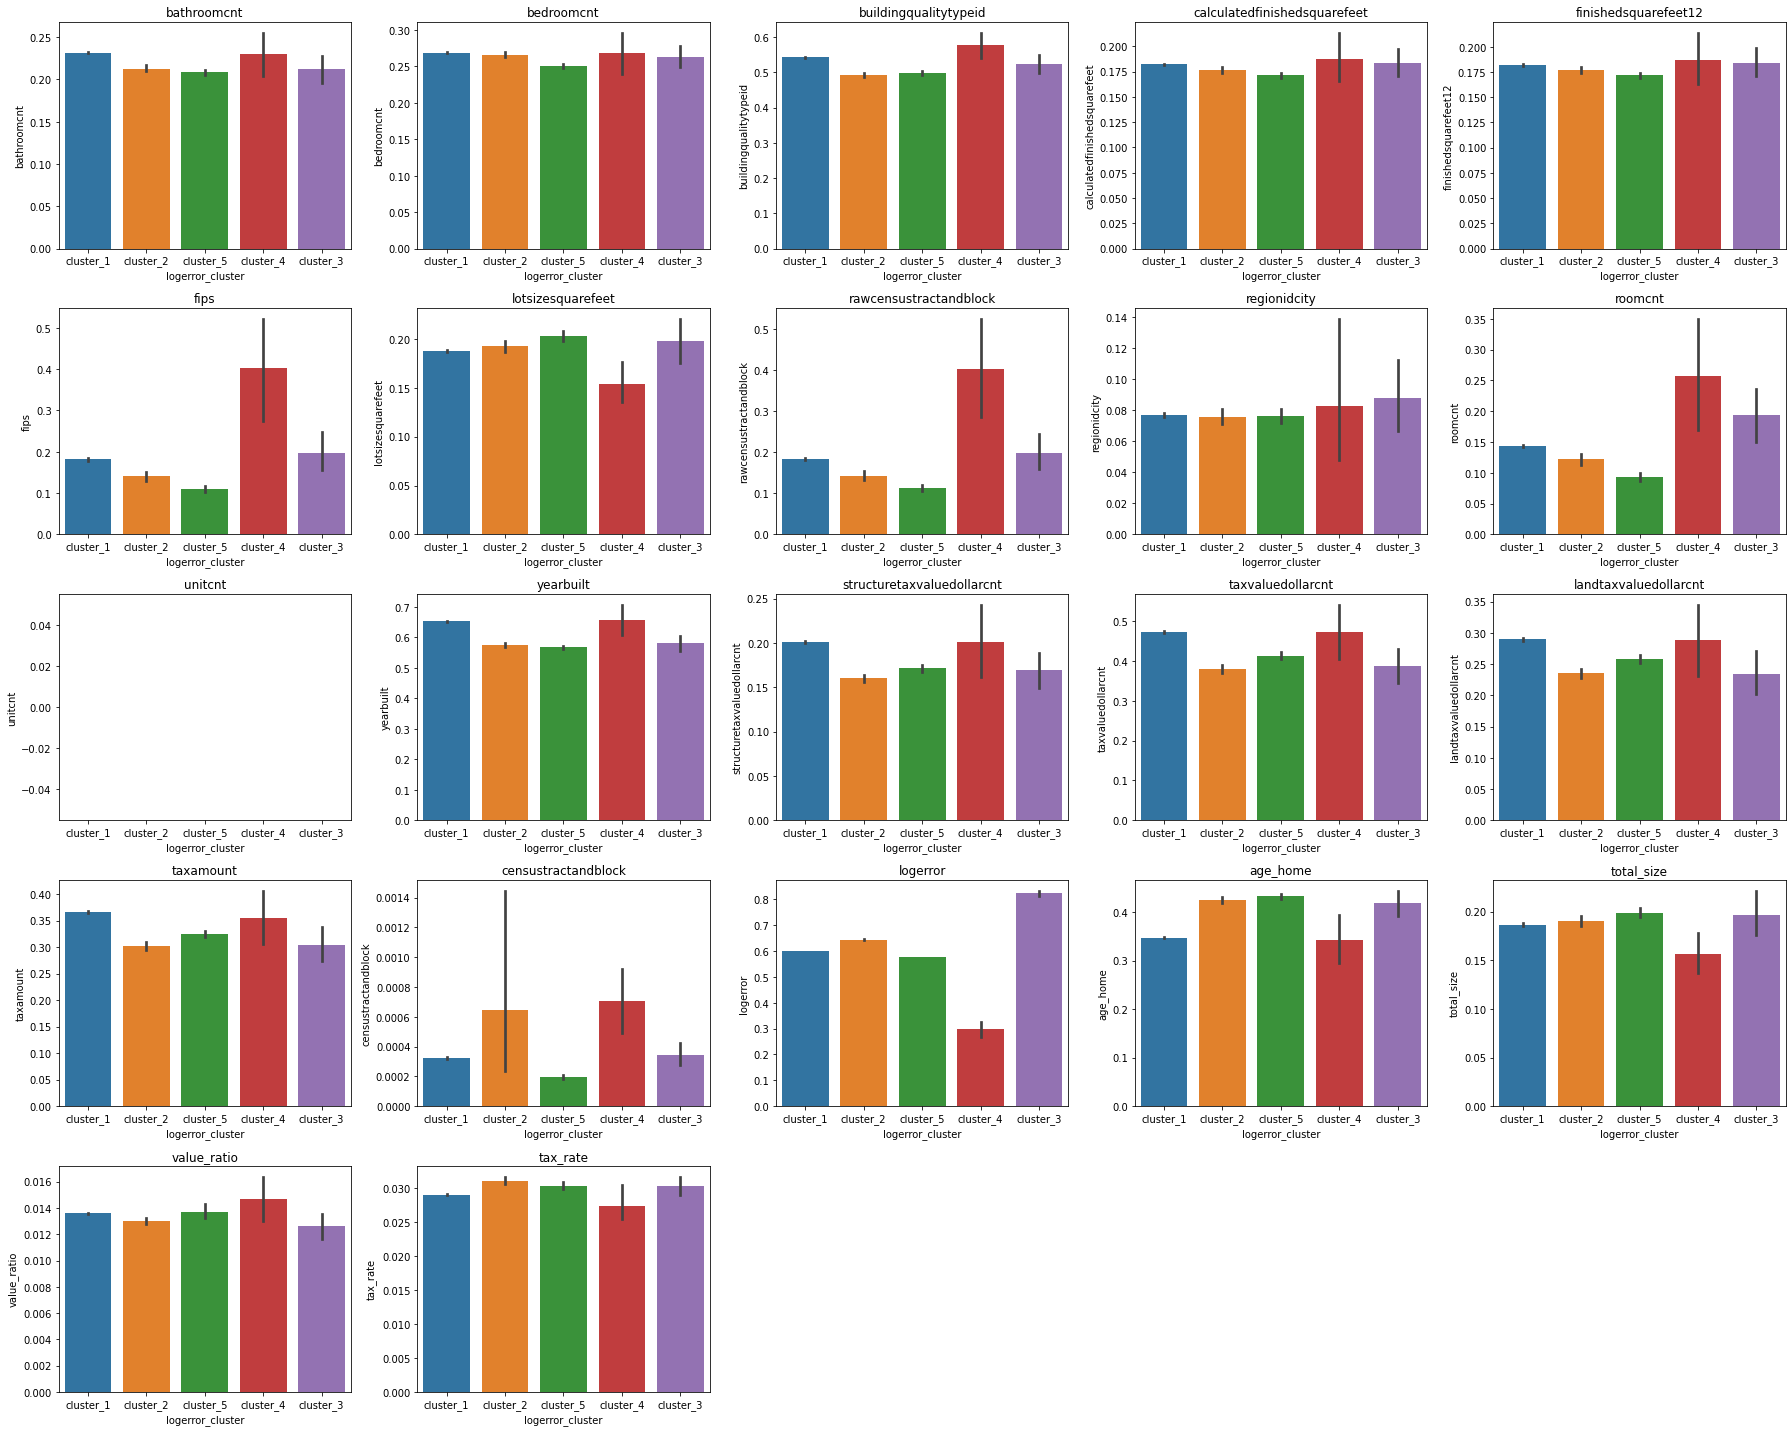

In [25]:
continuious_df = zillow.select_dtypes("number")

f = plt.figure(figsize=(25,20))
for i in range(continuious_df.shape[1]):
    f.add_subplot(5,5, i+1)
    sns.barplot(data=zillow, x="logerror_cluster", y=continuious_df.iloc[:,i])
    plt.title(continuious_df.columns[i])
plt.tight_layout()
plt.show()


The graph above looks to see if there are any clear groupings that could help us identify what is driving logerror. So far, we can see that there are infact some groupings that might help us predict logerror.

* Groupings that have no clear relationship:
    * `bathroomcnt`
    * `bedroomcnt`
    * `buildingqualityid`

This groups don't seem to have a super strong correlation of any kind, as the log error is evently distributed.

* Features that do show a strong relationship: 
    * `calculatedfinishedsquarefeet`
    * `fips`
    * `rawcensusblocktrack`
    * `roomcnt`
    * `taxvaluedollarcnt`
    * `landtaxvaluedollarcnt`
    * `taxamount`
    * `age_home`
    * `value_ratio`
    
These have very distrinct groups, which means we might be able to use them to accurately predict the patterns that can help us model logerror. 

One anomaly to point out - there seems to be that `tax_rate` only shows up in three of the clusters. This is really weird as the values used to derived this features are present in all four clusters.

#### Statistical Testing

We want to make sure and see if there are any statistically significant relationships from the observations we saw above.    

### Is there a statistical different in mean log error between the different counties? 

* $H_0$: There is no mean difference in log error between the different counties
* $H_a$: There is a statistical difference in log error between the different counties

$\alpha$ = 0.05

In [26]:
# first do a one tail test against the group mean
for i in range(0,3):
    county = zillow.county.value_counts().index[i]
    subgroup = zillow[zillow.county == county].logerror
    tstat, p = stats.ttest_1samp(subgroup, zillow.logerror.mean())
    print(f'{county}, p = {p:.2f}')

Los Angeles, p = 0.46
Orange County, p = 0.30
Ventura County, p = 0.96


We see that Orange County does have a statistically significant difference between it's mean log error and the groups. This is interesting because it can be really useful when indentifying what model to use. 

In [27]:
def ttail_t_test(county_1, county_2):
    alpha = 0.05
    subgroup_1 = zillow[zillow.county == county_1].logerror
    subgroup_2 = zillow[zillow.county == county_2].logerror
    
    tstats, p = stats.ttest_ind(subgroup_1, subgroup_2)
    
    reject = "Because p is less than 0.05, we reject the null hypothesis"
    fail_reject = "Because p is more than 0.05, we fail to reject the null hypothesis"

    if p < alpha:
        print(f'''
            {reject}
            The mean_logerror for LA = {subgroup_1.mean():.2f}
            The mean_logerror for Orange County = {subgroup_2.mean():.2}
            ''')
    else:
        print(f'''
            {fail_reject}
            The mean_logerror for LA = {subgroup_1.mean():.2f}
            The mean_logerror for Orange County = {subgroup_2.mean():.2}
            ''')

In [28]:
ttail_t_test("Los Angeles", "Orange County")


            Because p is more than 0.05, we fail to reject the null hypothesis
            The mean_logerror for LA = 0.60
            The mean_logerror for Orange County = 0.6
            


In [29]:
ttail_t_test("Los Angeles", "Ventura County")


            Because p is more than 0.05, we fail to reject the null hypothesis
            The mean_logerror for LA = 0.60
            The mean_logerror for Orange County = 0.6
            


In [30]:
ttail_t_test("Orange County", "Ventura County")


            Because p is more than 0.05, we fail to reject the null hypothesis
            The mean_logerror for LA = 0.60
            The mean_logerror for Orange County = 0.6
            


Oddly, it doesn't seem that there is any significant difference in log error between the two different groups.

### Is there any statistically correlation between the room count and logerro?

* $H_0$: There is no correlation between room count and logerror
* $H_a$: There is a correlation between room count and logerror

$\alpha$ = 0.05

In [31]:
r, p = stats.pearsonr(zillow.roomcnt, zillow.logerror)
print(f"Because our p values is {p:.2f}, we can reject the null hypothesis")
print(f" Our r values is {r:.2f}, so the correlation is not necesarly strong")

Because our p values is 0.00, we can reject the null hypothesis
 Our r values is 0.02, so the correlation is not necesarly strong


### Is there a strong correlation between taxdollarcnt and logerror

* $H_0$: There is no strong correlation between taxdollarcnt and logerror
* $H_a$: There is a strong correlation between taxdollarcnt and logerror

$\alpha$ = 0.05

In [32]:
r, p = stats.pearsonr(zillow.taxvaluedollarcnt, zillow.logerror)
print(f"Because our p values is {p:.2f}, we can reject the null hypothesis")
print(f" Our r values is {r:.2f}, so the correlation is not necesarly strong. Because it is a negative correlation, logerror increases, taxvalue decreases")
print("Likely what this means is that logerror is higher on houses of smaller value")

Because our p values is 0.00, we can reject the null hypothesis
 Our r values is -0.03, so the correlation is not necesarly strong. Because it is a negative correlation, logerror increases, taxvalue decreases
Likely what this means is that logerror is higher on houses of smaller value


### Visualizing Relationships

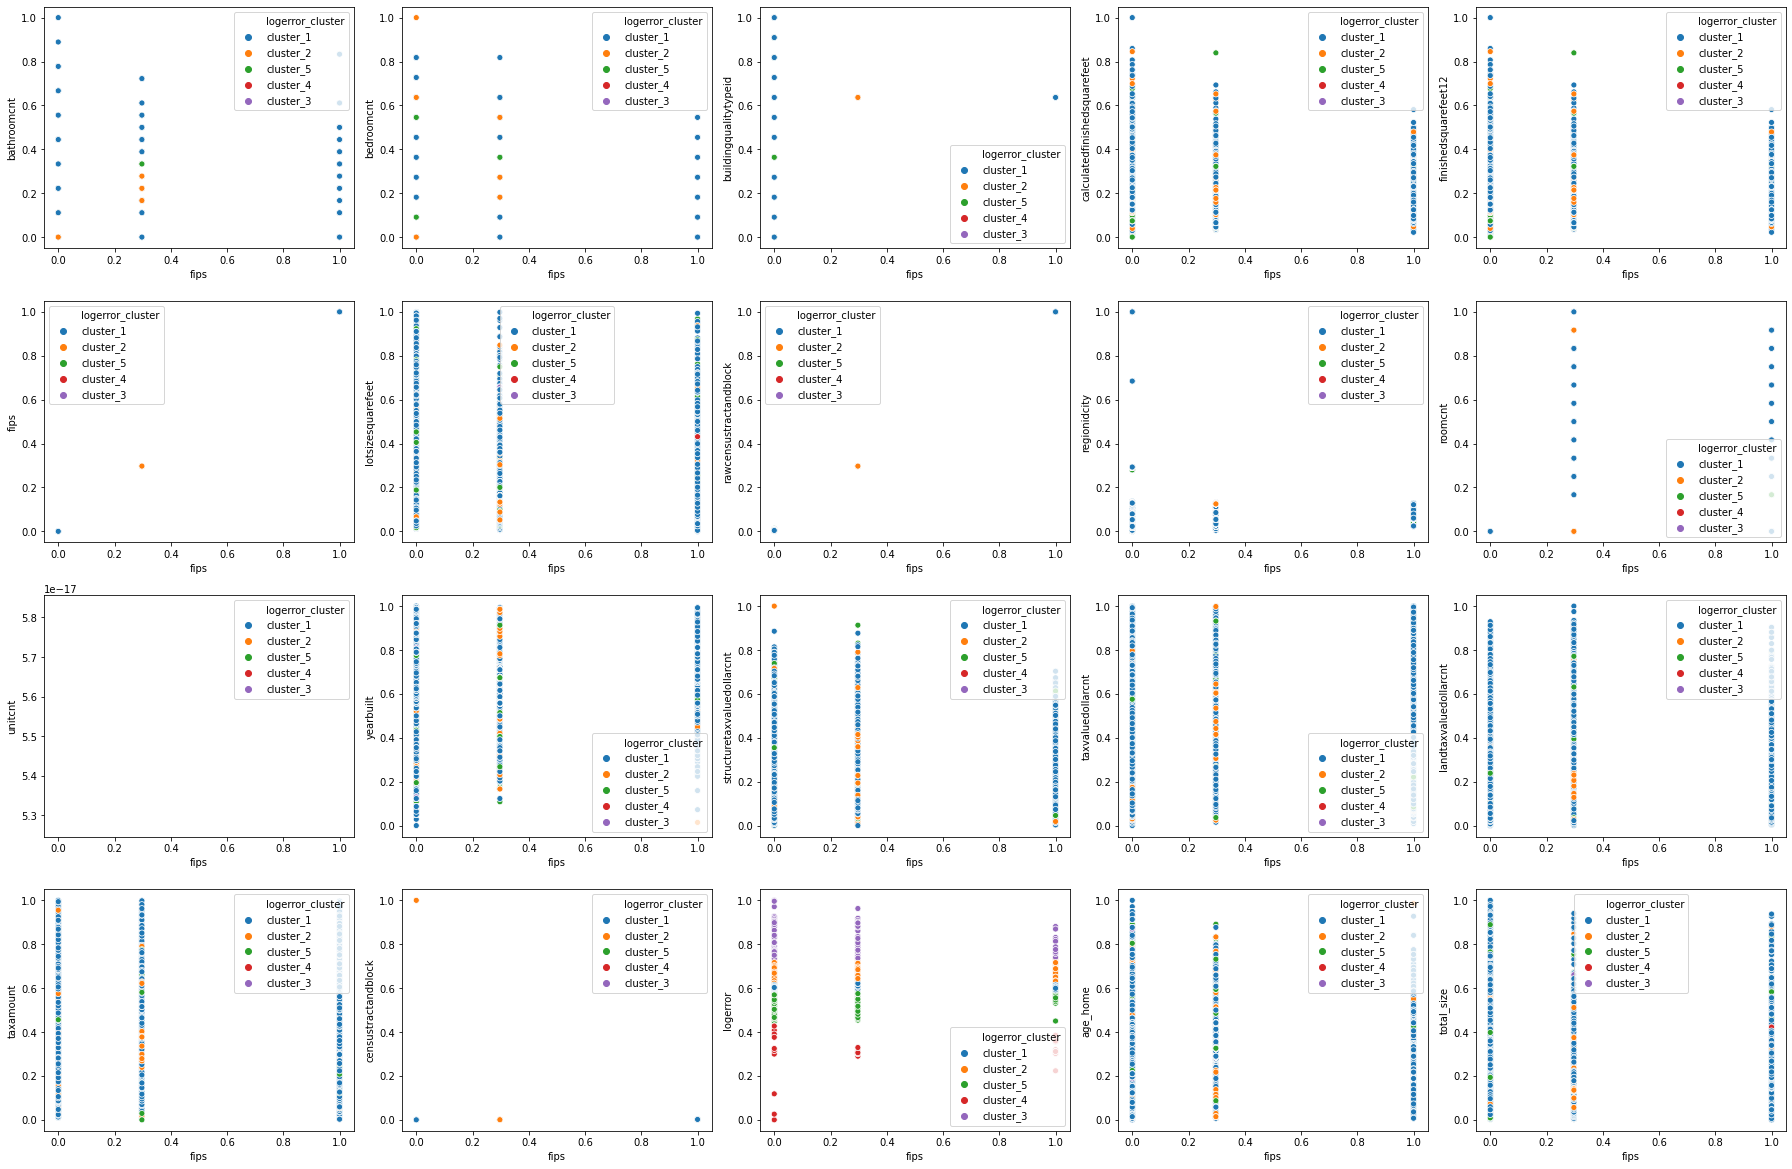

In [33]:
# Is there a relationship between fips and the other categories that can be visualized by our logerror cluster?
f = plt.figure(figsize=(25,20))
for i in range(20):
    f.add_subplot(5,5, i+1)
    sns.scatterplot(data=zillow, y=continuious_df.iloc[:,i], x="fips", hue="logerror_cluster")
#     plt.title(f"{continuious_df.columns[i]} x {continuious_df.columns[i+1]}")
plt.tight_layout()
plt.show()

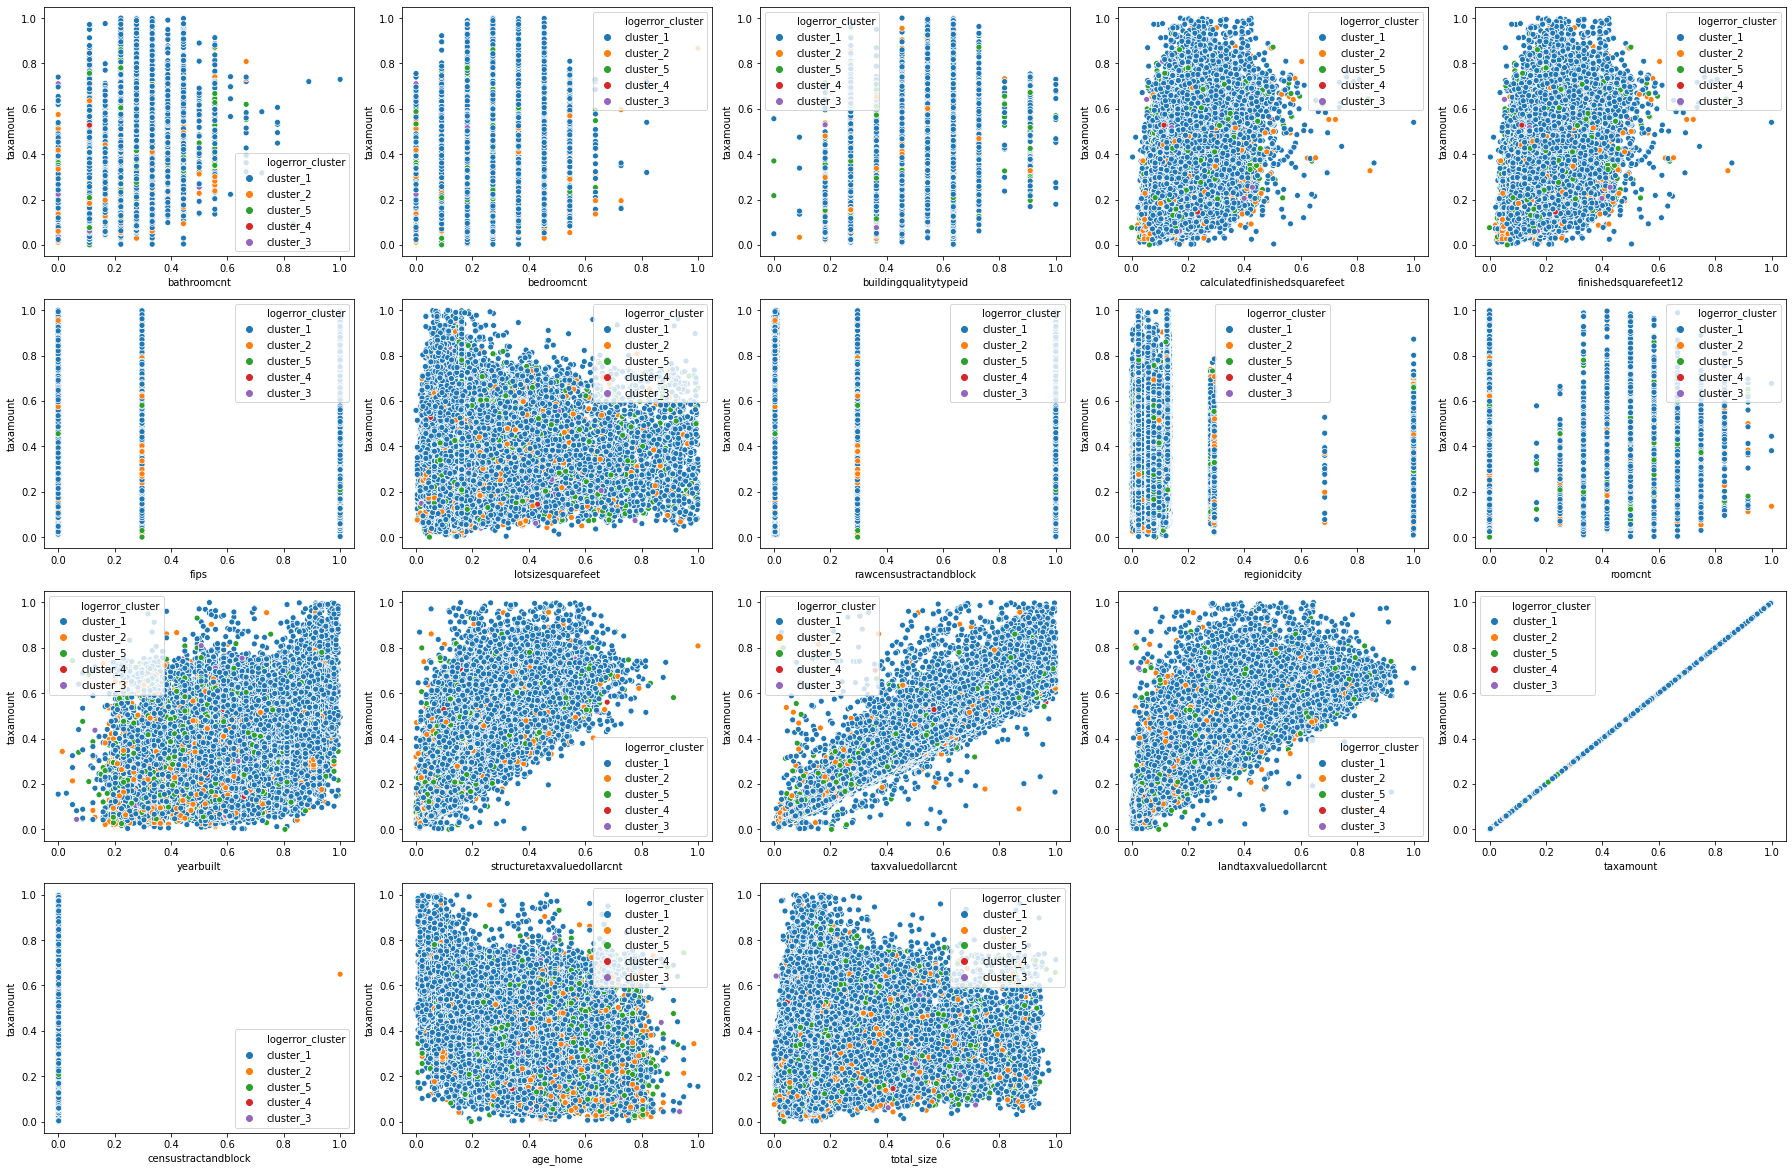

In [34]:
continuious_df = zillow.select_dtypes("number")
continuious_df.drop(columns=["logerror", "unitcnt"], inplace=True)

f = plt.figure(figsize=(25,20))
for i in range(continuious_df.shape[1]-2):
    f.add_subplot(5,5, i+1)
    sns.scatterplot(data=zillow, x=continuious_df.iloc[:,i], y="taxamount", hue="logerror_cluster")
#     plt.title(f"{continuious_df.columns[i]} x {continuious_df.columns[i+1]}")
plt.tight_layout()
plt.show()

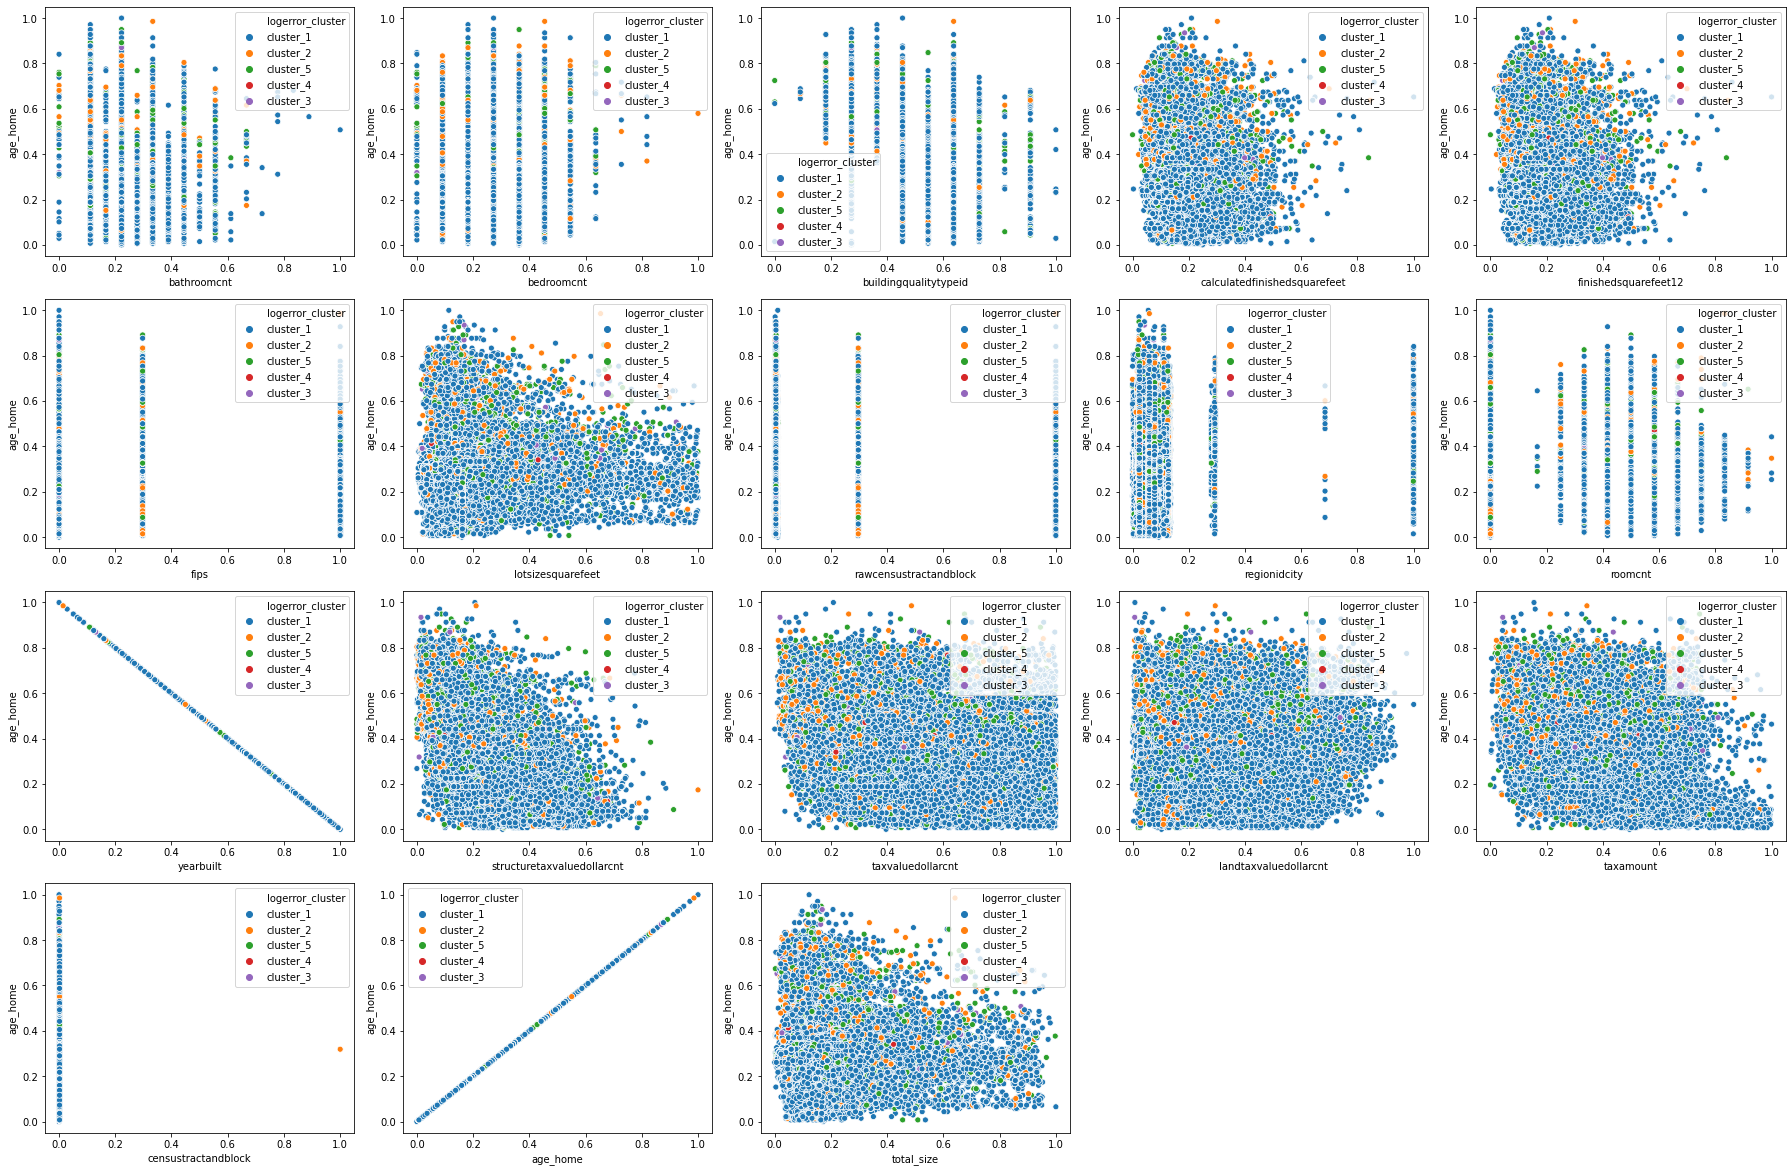

In [35]:
continuious_df = zillow.select_dtypes("number")
continuious_df.drop(columns=["logerror", "unitcnt"], inplace=True)

f = plt.figure(figsize=(25,20))
for i in range(continuious_df.shape[1]-2):
    f.add_subplot(5,5, i+1)
    sns.scatterplot(data=zillow, x=continuious_df.iloc[:,i], y="age_home", hue="logerror_cluster")
#     plt.title(f"{continuious_df.columns[i]} x {continuious_df.columns[i+1]}")
plt.tight_layout()
plt.show()

It seems that there are no clear distinction between these groups. I think the reason for it has to do with the outliers, which seems to be having a big impact on the groupings. 

Next - we will create new clusters using other independent varibles, to see if we see some trends. 

In [36]:
def k_cluster_all(df, x, n):
    df = df.select_dtypes(exclude="object")
    kmeans = KMeans(n_clusters=n, random_state=123)
    kmeans.fit(df)
    df["cluster"] = kmeans.predict(df)
    df.cluster = 'cluster_' + (df.cluster + 1).astype('str')

    for col in df.columns:
        if col != x and col != "cluster":
            sns.relplot(data=df, x=x, y=col, hue='cluster', alpha=.3)
            plt.show()
    df.drop(columns="cluster", inplace=True)



### Location

We know that tax rate has a big impact, especially because the tax rate changes so much across the counties. We will see if we can combine these features together to create a new cluster.

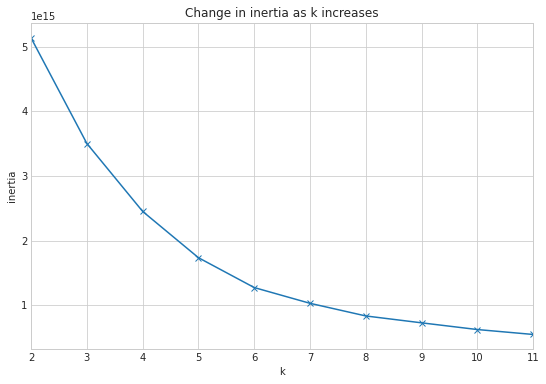

In [37]:
model.create_elbow_graph(zillow, ["tax_rate", "latitude", "longitude" ])

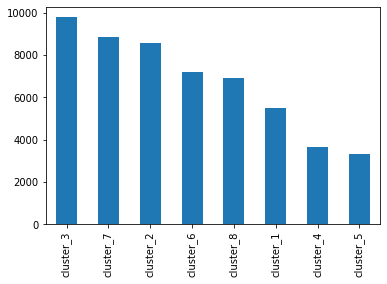

In [38]:
zillow, centroid = model.create_cluster(zillow, 8, ["tax_rate", "latitude", "longitude" ], "tax_location_cluster")
zillow.tax_location_cluster.value_counts().plot.bar()

In [39]:
centroid_2 = pd.DataFrame({"tax_location_cluster": zillow.tax_location_cluster.unique(), "tax_rate": centroid[:,0], "latitude": centroid[:,1], "longitude": centroid[:,2]})

We have a better distribution of clusters here actually, which is much better. We will now try to see if there are any clear patters that we can desern from this.

In [40]:
zillow = zillow.merge(centroid_2, how='left', on="tax_location_cluster", suffixes=("", "_centroid")).set_index(zillow.index)

In [41]:
zillow.head(10)

propertylandusetypeid  parcelid       id     latitude    longitude  \
0                   261  10711855  1087254  3.42226e+07 -1.18617e+08   
1                   261  10711877  1072280  3.42203e+07 -1.18616e+08   
2                   261  10711888  1340933  3.42225e+07 -1.18617e+08   
3                   261  10711910  1878109  3.42219e+07 -1.18616e+08   
4                   261  10711923  2190858  3.42206e+07 -1.18615e+08   
5                   261  10711945   281974  3.42207e+07 -1.18614e+08   
6                   261  10711956  2981006  3.42242e+07 -1.18614e+08   
7                   261  10711995  2548580  3.42235e+07 -1.18618e+08   
8                   261  10712005  1699185  3.42242e+07 -1.18619e+08   
9                   261  10712007  2831935  3.42245e+07 -1.18619e+08   

  propertycountylandusecode regionidcounty regionidzip assessmentyear  \
0                      0101           3101       96339           2016   
1                      0101           3101       96339           2016   
2                      0100           3101       96339           2016   
3                      0101           3101       96339           2016   
4                      0101           3101       96339           2016   
5                      0101           3101       96339           2016   
6                      0100           3101       96339           2016   
7                      0100           3101       96339           2016   
8                      0101           3101       96339           2016   
9                      0101           3101       96339           2016   

  max(transactiondate)  ...  logerror  age_home total_size value_ratio  \
0           2017-07-07  ...  0.599260  0.318841   0.216894    0.015366   
1           2017-08-29  ...  0.602925  0.318841   0.209353    0.015747   
2           2017-04-04  ...  0.610159  0.318841   0.225930    0.013431   
3           2017-03-17  ...  0.594892  0.405797   0.249334    0.005611   
4           2017-03-24  ...  0.598985  0.405797   0.257893    0.014848   
5           2017-01-30  ...  0.600373  0.420290   0.273561    0.019838   
6           2017-07-03  ...  0.603213  0.405797   0.262011    0.019365   
7           2017-03-09  ...  0.605513  0.311594   0.208638    0.010275   
8           2017-08-01  ...  0.601768  0.311594   0.204867    0.005584   
9           2017-02-22  ...  0.660181  0.311594   0.203350    0.005357   

   tax_rate  logerror_cluster  tax_location_cluster  tax_rate_centroid  \
0  0.026793         cluster_1             cluster_8           0.024593   
1  0.026875         cluster_1             cluster_8           0.024593   
2  0.026836         cluster_1             cluster_8           0.024593   
3  0.031290         cluster_1             cluster_8           0.024593   
4  0.027545         cluster_1             cluster_8           0.024593   
5  0.027671         cluster_1             cluster_8           0.024593   
6  0.027313         cluster_1             cluster_8           0.024593   
7  0.026667         cluster_1             cluster_8           0.024593   
8  0.029923         cluster_1             cluster_8           0.024593   
9  0.031981         cluster_2             cluster_8           0.024593   

   latitude_centroid  longitude_centroid  
0       3.358986e+07       -1.176796e+08  
1       3.358986e+07       -1.176796e+08  
2       3.358986e+07       -1.176796e+08  
3       3.358986e+07       -1.176796e+08  
4       3.358986e+07       -1.176796e+08  
5       3.358986e+07       -1.176796e+08  
6       3.358986e+07       -1.176796e+08  
7       3.358986e+07       -1.176796e+08  
8       3.358986e+07       -1.176796e+08  
9       3.358986e+07       -1.176796e+08  

[10 rows x 41 columns]

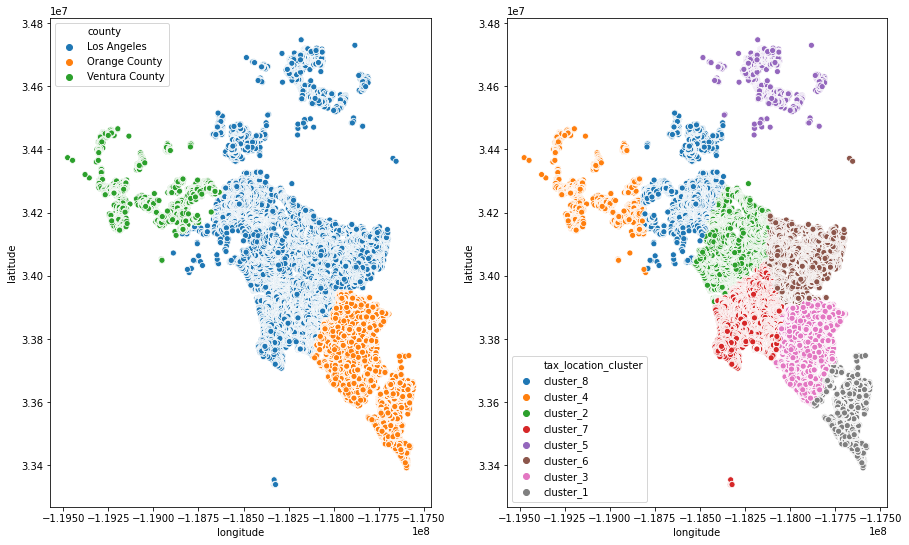

In [42]:
f, axes = plt.subplots(1, 2, figsize=(15, 9))
sns.scatterplot(data=zillow, y="latitude", x="longitude", hue="county", ax=axes[0])
sns.scatterplot(data=zillow, y="latitude", x="longitude", hue="tax_location_cluster", ax=axes[1])

In [43]:
value = zillow.tax_location_cluster.unique()
for i in range(len(value)):
    mean = zillow[zillow.tax_location_cluster == value[i]].logerror.median()
    print(f'{value[i]} has a mean of {mean}')

cluster_8 has a mean of 0.6012165497920972
cluster_4 has a mean of 0.6010372996660478
cluster_2 has a mean of 0.6006207312181293
cluster_7 has a mean of 0.6009525124260477
cluster_5 has a mean of 0.6003325372368706
cluster_6 has a mean of 0.6011925200676898
cluster_3 has a mean of 0.6009188865629214
cluster_1 has a mean of 0.6009836997986714


There doesn't seem to a significant difference between the mean log error and the clusters by location. I will not perform a statistical test, just because I predict that the mean will not be different. I am hoping that we can still use the centroids as a differentiating factor. 

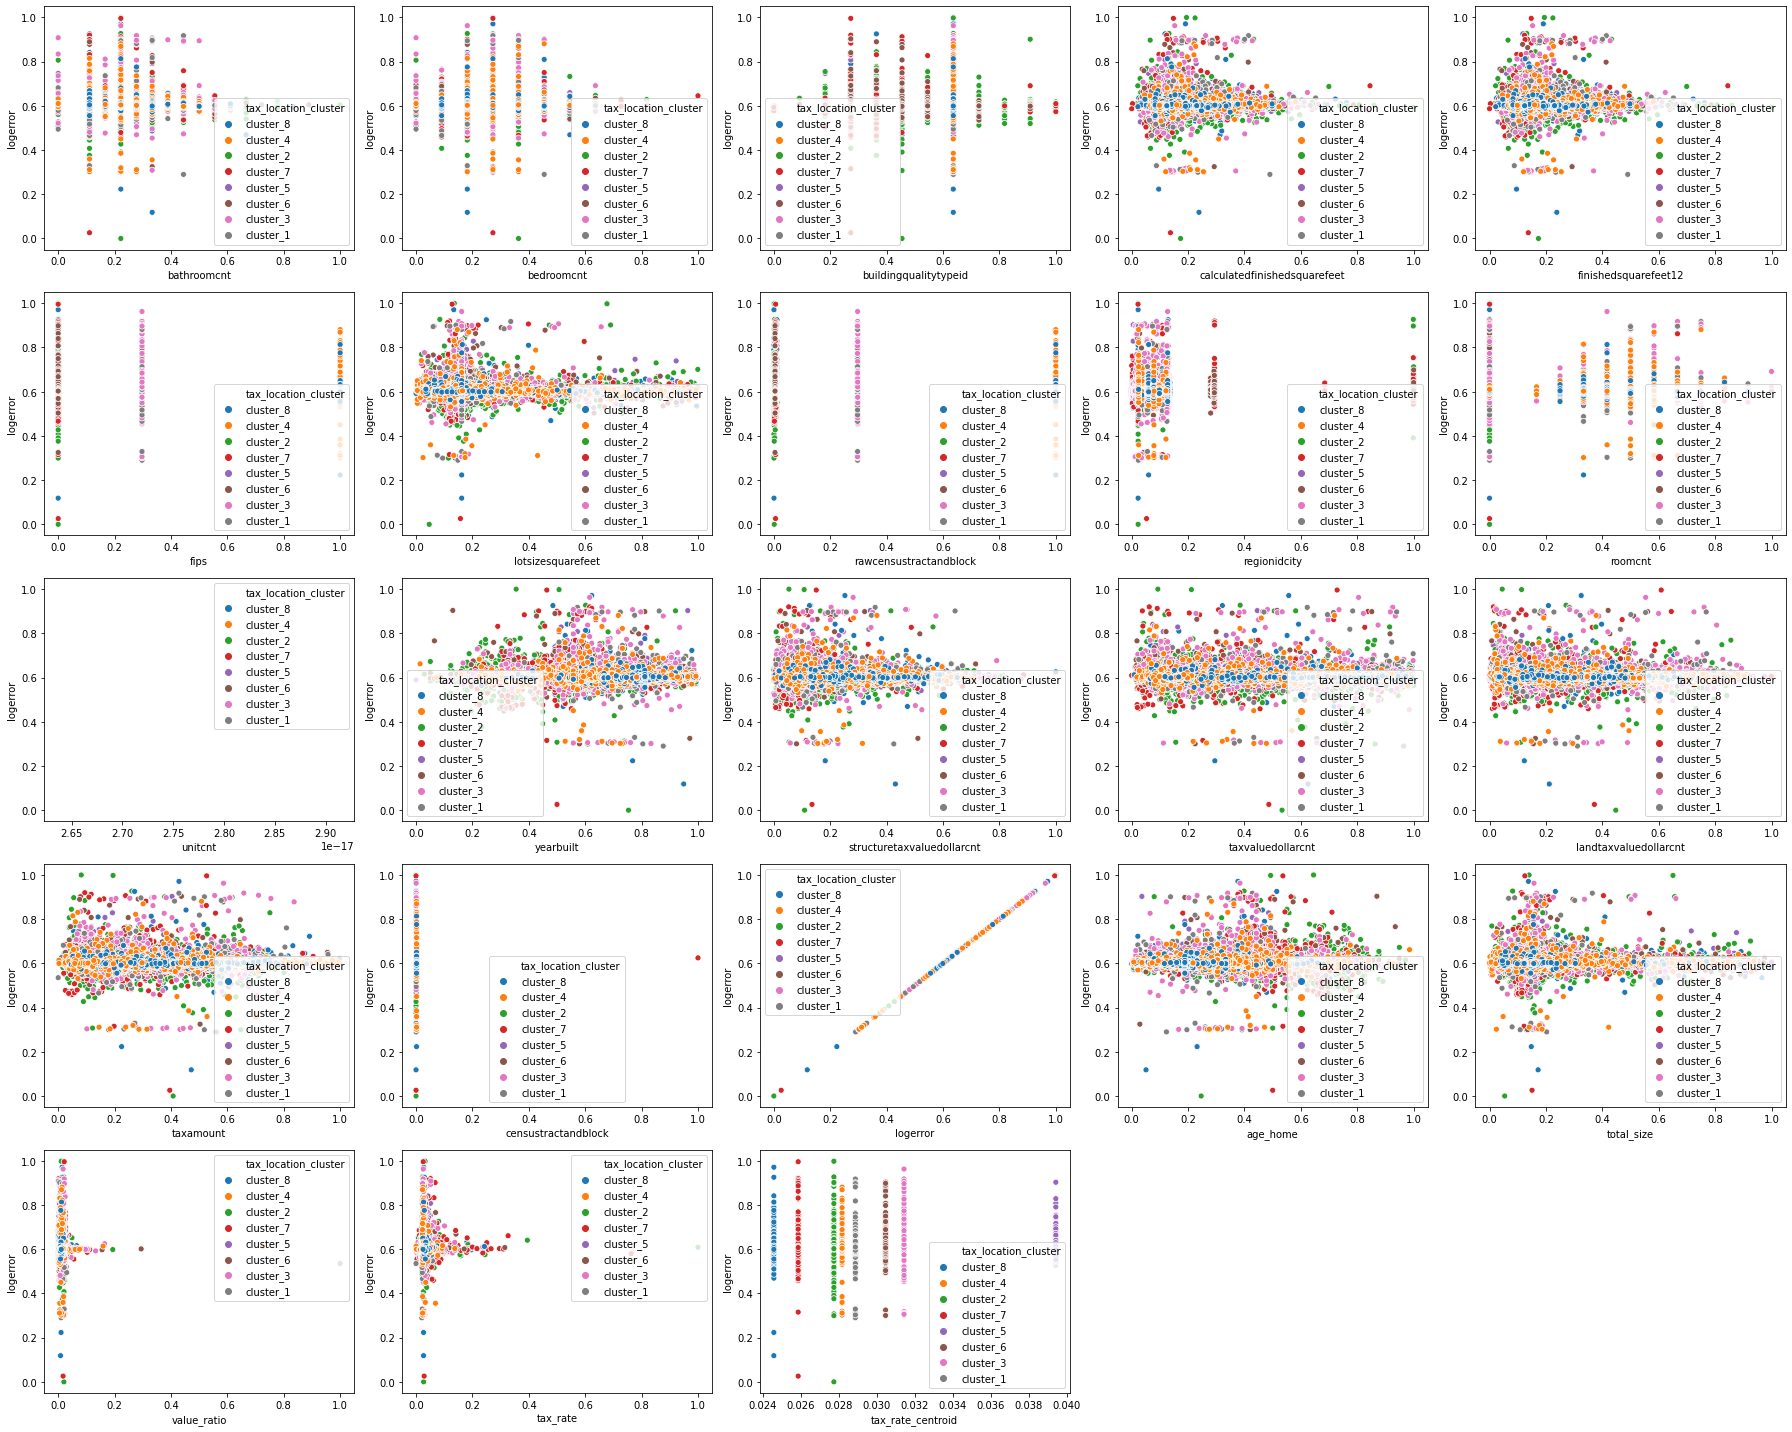

In [44]:
continuious_df = zillow.select_dtypes("number")


f = plt.figure(figsize=(25,20))
for i in range(continuious_df.shape[1]-2):
    f.add_subplot(5,5, i+1)
    sns.scatterplot(data=zillow, x=continuious_df.iloc[:,i], y="logerror", hue="tax_location_cluster")
#     plt.title(f"{continuious_df.columns[i]} x {continuious_df.columns[i+1]}")
plt.tight_layout()
plt.show()

# House Age

In [45]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53746 entries, 0 to 53745
Data columns (total 41 columns):
propertylandusetypeid           53746 non-null object
parcelid                        53746 non-null object
id                              53746 non-null object
latitude                        53746 non-null object
longitude                       53746 non-null object
propertycountylandusecode       53746 non-null object
regionidcounty                  53746 non-null object
regionidzip                     53746 non-null object
assessmentyear                  53746 non-null object
max(transactiondate)            53746 non-null object
propertylandusedesc             53746 non-null object
heatingorsystemdesc             53746 non-null object
state                           53746 non-null object
county                          53746 non-null object
bathroomcnt                     53746 non-null float64
bedroomcnt                      53746 non-null float64
buildingqualitytypeid    

In [46]:
k_cluster_all(zillow, "age_home", 5)

Some key insights to take away:

* There is a clear distinction between fips and our cluster. This likely indicates that ceirtain counties have more newer or older houses. 

* There also seems to be a clear correlation with total_size. The clusters seem to also mirror houses sizes

* Most importantly, however, I there seems to be a faint correlation between `logerror` and our clusters, which is a really positive sign.

### Statistical testing

### Is there a correlation between house size and house age?

* $H_0$: There is no correlationship between house size and house age
* $H_a$: There is a correlationship between house size and house age

$\alpha$ = 0.05

In [47]:
r, p = stats.pearsonr(zillow.total_size, zillow.age_home)

print(f'''

Our p values is {p:.2f}, which means we reject the null hypothesis, and assume there is a statistically 
significant correlation between these two vairbles. 

The r values is {r:.2f}, which means that there is a negative correlation, but it is not very strong
''')



Our p values is 0.00, which means we reject the null hypothesis, and assume there is a statistically 
significant correlation between these two vairbles. 

The r values is -0.15, which means that there is a negative correlation, but it is not very strong



# Is there a correlation between home age and logerror?

* $H_0$: There is no correlation between home age and logerror
* $H_a$: There is a correlation between home age and logerror

$\alpha$ = 0.05

In [48]:
r, p = stats.pearsonr(zillow.logerror, zillow.age_home)
print(f'''

Because p({p:.2f}) is larger than our alpha, we fail to reject the null hypothesis, and assume that there is no 
statistically significant correlation between logerror and home age. 

This doesn't mean that there might not be some correlation within the clusters.
''')



Because p(0.00) is larger than our alpha, we fail to reject the null hypothesis, and assume that there is no 
statistically significant correlation between logerror and home age. 

This doesn't mean that there might not be some correlation within the clusters.



## Is there a correlation between home age and taxvaluedollarcnt?

* $H_0$: There is no correlation between home age and taxvaluedollarcnt
* $H_a$: There is a correlation between home age and taxvaluedollarcnt

$\alpha$ = 0.05

In [49]:
r, p = stats.pearsonr(zillow.taxvaluedollarcnt, zillow.age_home)
print(f'''

Because p({p:.2f}) is smaller than our alpha, we reject the null hypothesis, and assume that there is a statistically significant correlation between home age and tax value. 
This is really important because we know the logerror is derived from predicting taxvaluedollarcnt, and hence this might be a really good indication. 

The r value is {r:.2f}, which means that as the age of the house increases, the taxvaluedollarcnt decreases, which 
is a very interesting finding.

''')



Because p(0.00) is smaller than our alpha, we reject the null hypothesis, and assume that there is a statistically significant correlation between home age and tax value. 
This is really important because we know the logerror is derived from predicting taxvaluedollarcnt, and hence this might be a really good indication. 

The r value is -0.27, which means that as the age of the house increases, the taxvaluedollarcnt decreases, which 
is a very interesting finding.




# Property Size

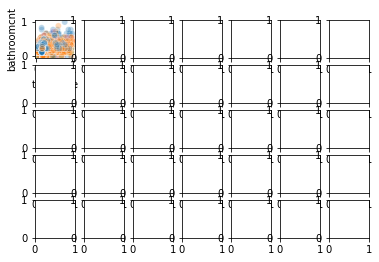

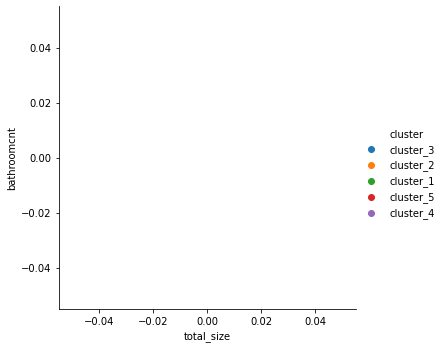

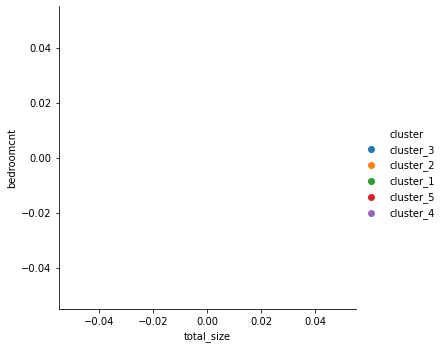

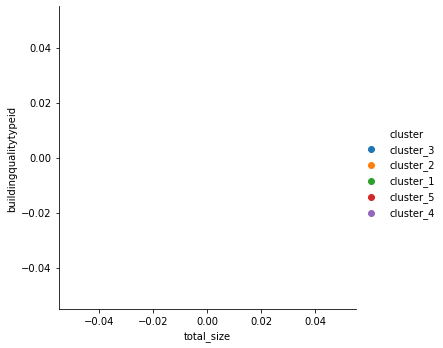

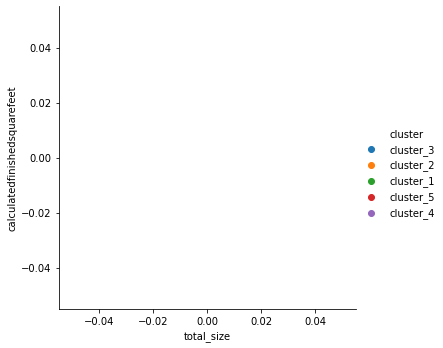

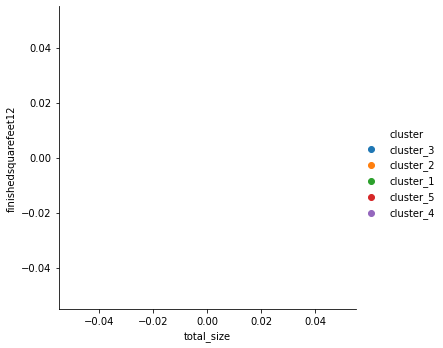

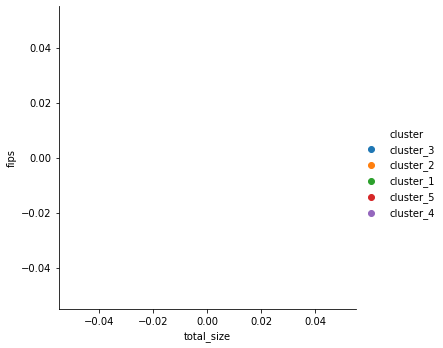

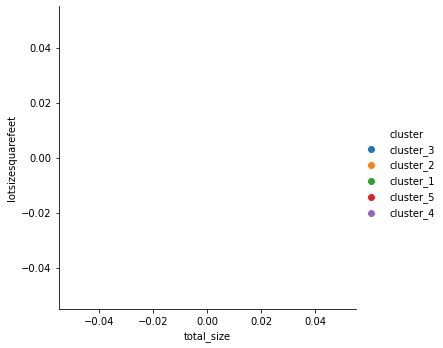

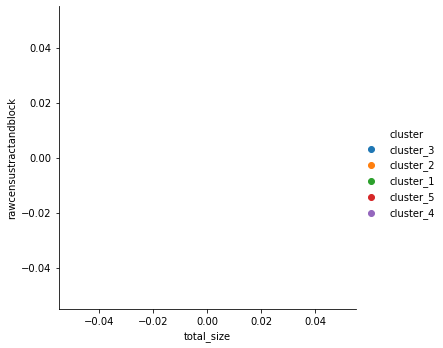

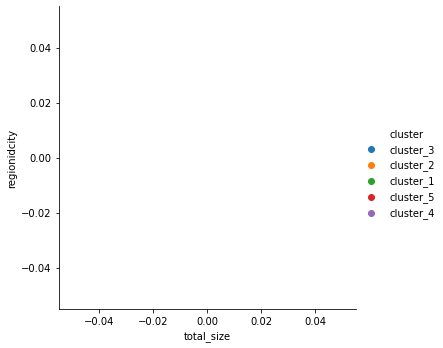

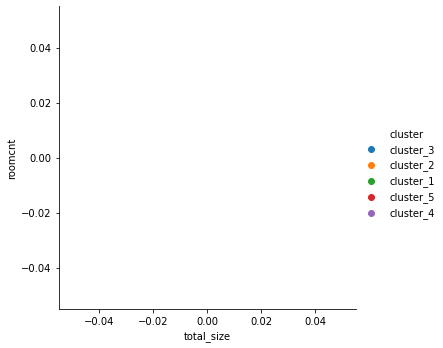

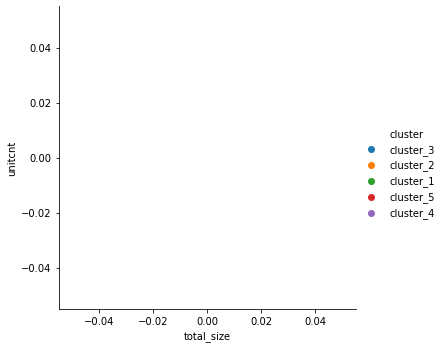

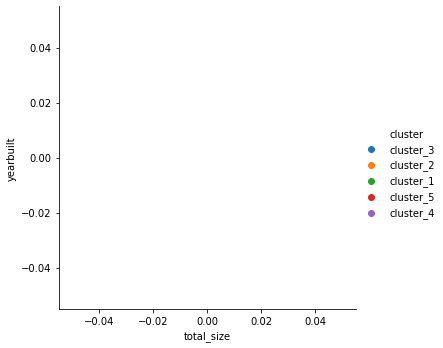

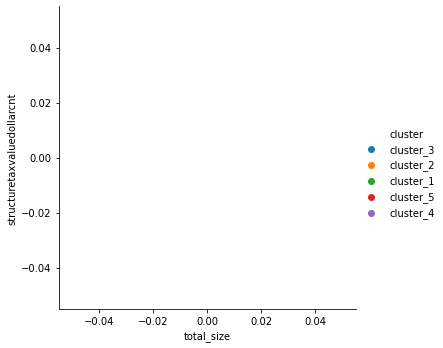

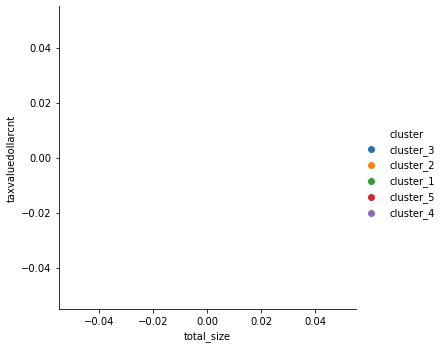

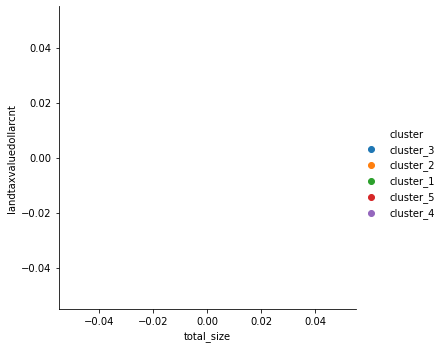

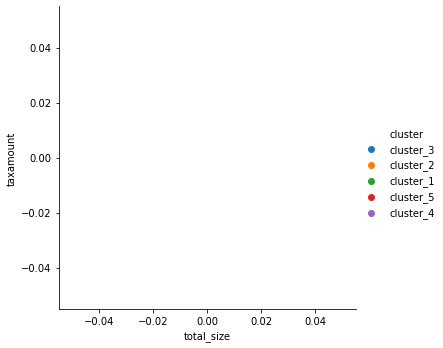

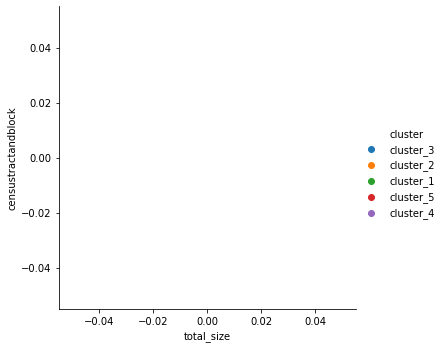

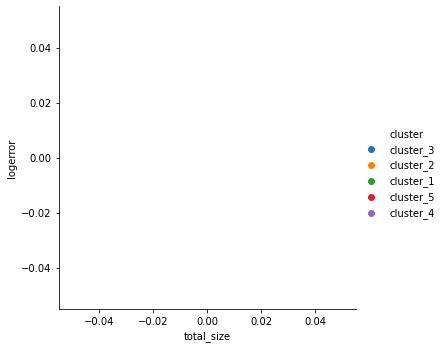

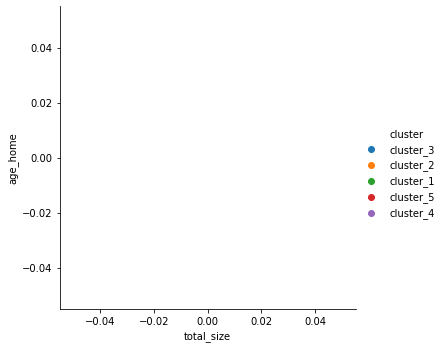

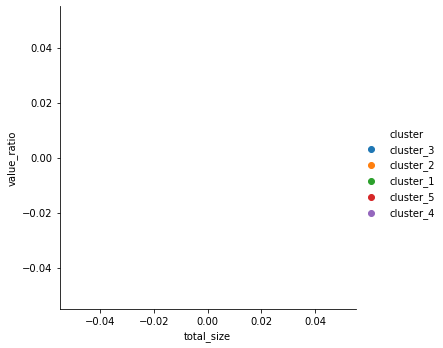

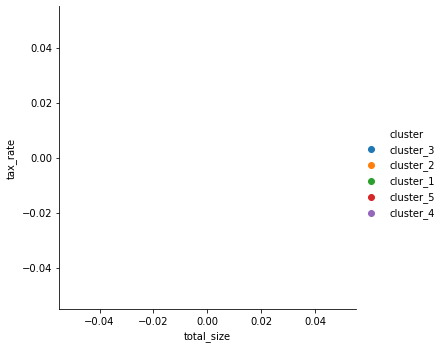

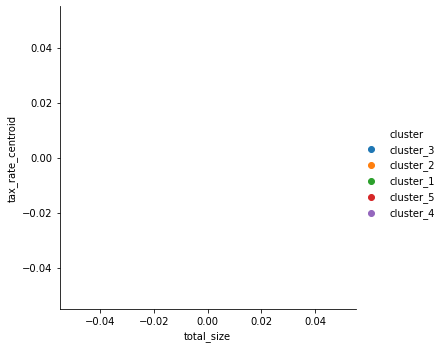

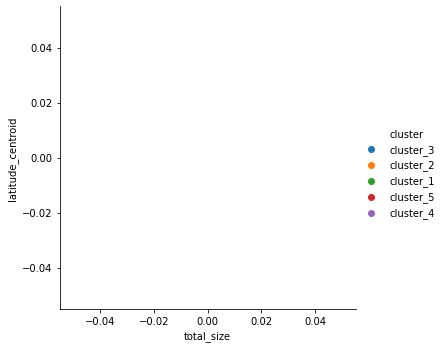

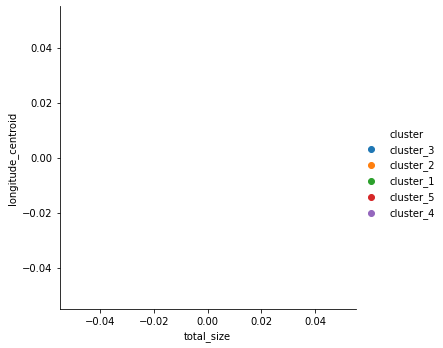

In [50]:
df = zillow.select_dtypes(exclude="object")
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df)
df["cluster"] = kmeans.predict(df)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')


f,axes = plt.subplots(5,7)
for count, col in enumerate(df.columns):
    if col != "total_size" and col != "cluster":
        axes = axes.flatten()
        sns.relplot(data=df, x="total_size", y=col, hue='cluster', alpha=.3, ax=axes[count])
        plt.show()
df.drop(columns="cluster", inplace=True)

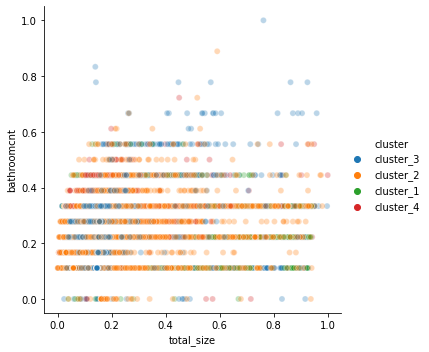

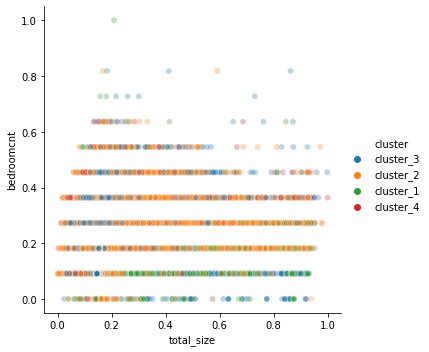

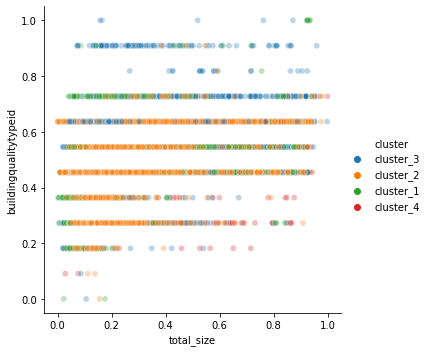

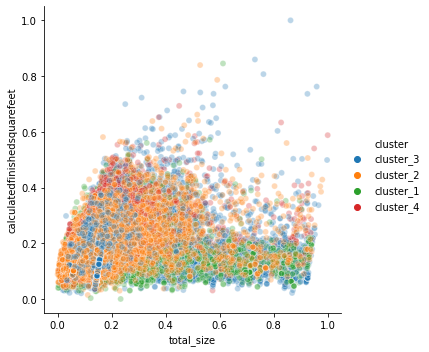

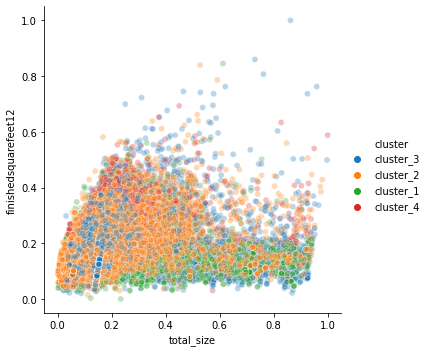

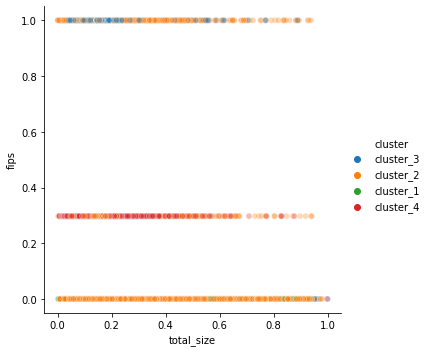

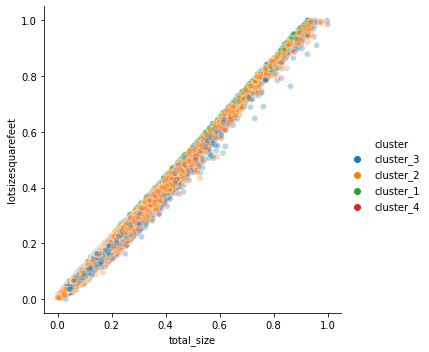

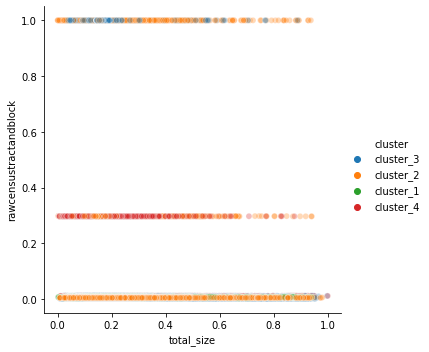

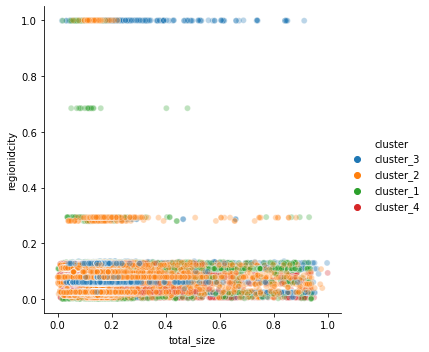

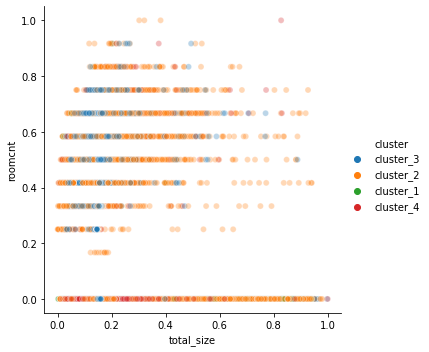

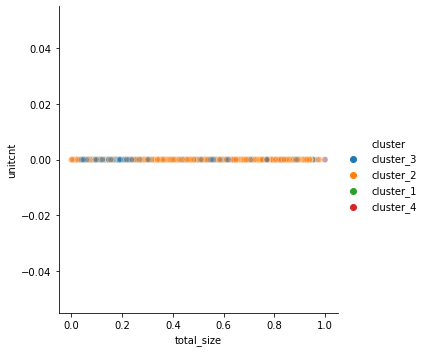

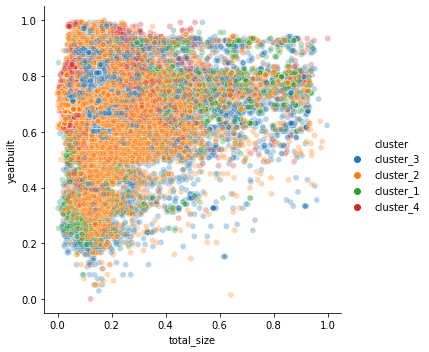

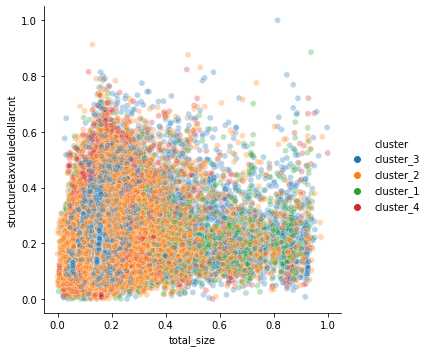

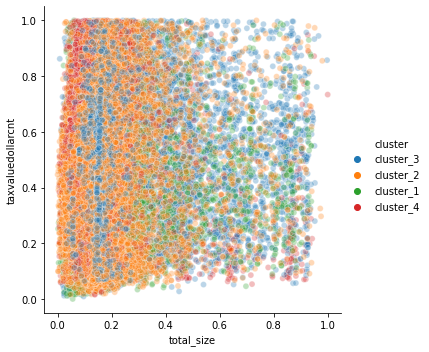

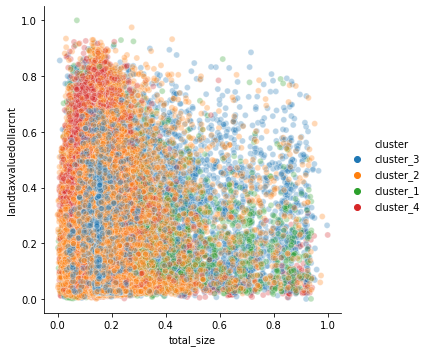

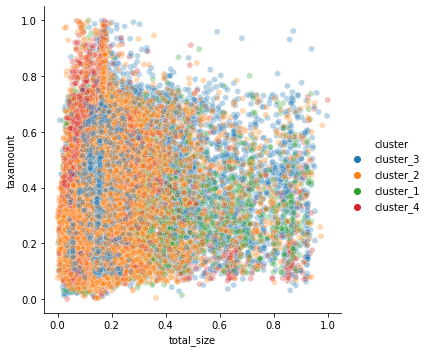

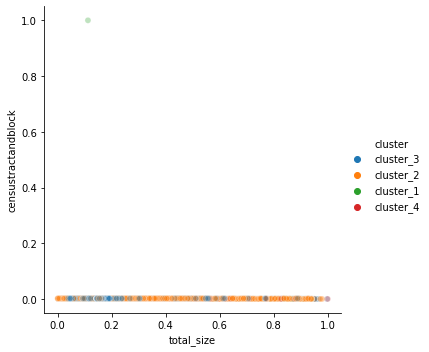

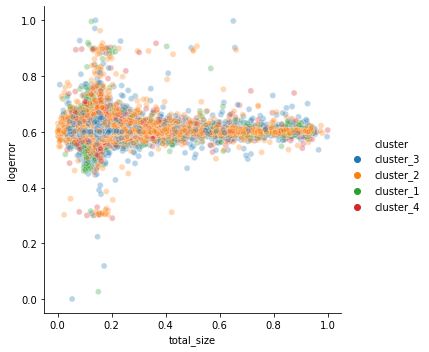

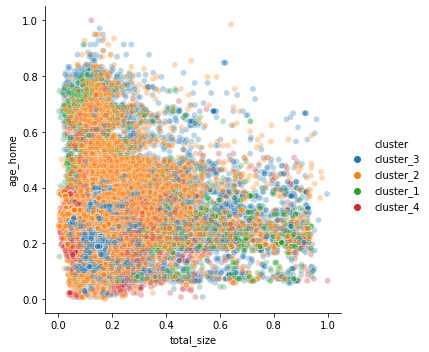

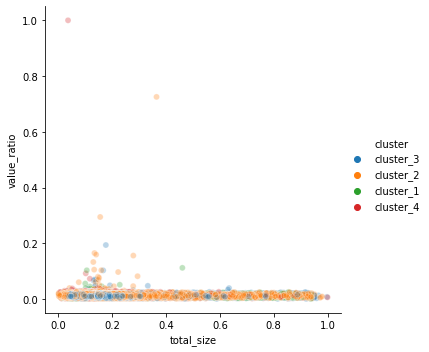

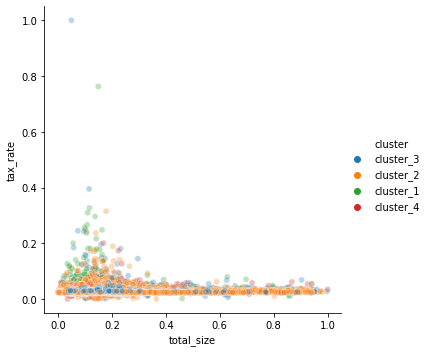

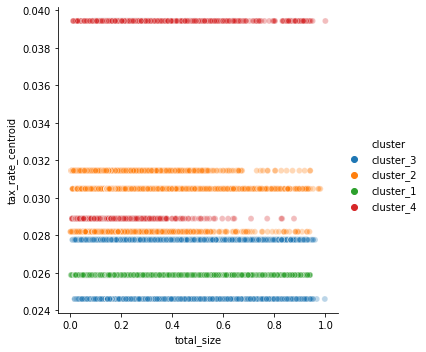

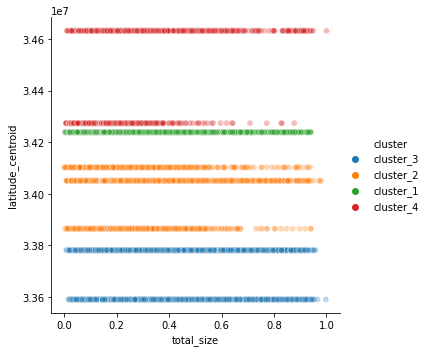

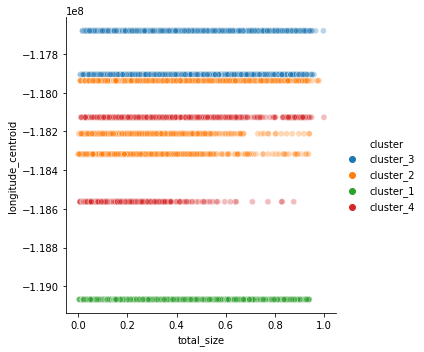

In [51]:
k_cluster_all(zillow, "total_size", 4)

There seems to be more correlations with the tax related categories when looking at these clusters. 

* There still seems like there is a really nice distribution between the clusters and the counties.

* There also seems to be a grouping with `year_built`. It might be possible that we can actually further combine these two to create more robust clusters.

#### Statistical Testing:


# Is there a significant correlation between the size of the property and the logerror?

* $H_0$: There is no significant correlation between size of the property and logerror
* $H_a$: There is a significant correlation between size of the property and logerror

$\alpha$ = 0.05

In [52]:
r, p = stats.pearsonr(zillow.total_size, zillow.logerror)

print(f'''

Because p ({p:.2f}) is lower than our alpha, we reject the null hypothesis, and assume that there is a significant
relationship between size and logerror.

Our r values is {r:.2f}, which means there is a not a very strong correlation, but it is a positive one.

''')



Because p (0.04) is lower than our alpha, we reject the null hypothesis, and assume that there is a significant
relationship between size and logerror.

Our r values is 0.01, which means there is a not a very strong correlation, but it is a positive one.




# Is there a signicant correlation between size of the property and taxvaluedollarcnt?

* $H_0$: There is no correlation between size and taxvaluedollarcnt
* $H_a$: There is a correlation between size and taxvaluedollarcnt

$\alpha$ = 0.05

In [53]:
r, p = stats.pearsonr(zillow.total_size, zillow.taxvaluedollarcnt)
print(f'''

Because our p({p:.2f}) is smaller than our alpha, we reject the null hyptothesis and assume there is a 
relationship between total_size and taxvalue

The r values is {r:.2f}, which means there is a positive correlation, but it is not very strong.
''')



Because our p(0.00) is smaller than our alpha, we reject the null hyptothesis and assume there is a 
relationship between total_size and taxvalue

The r values is 0.05, which means there is a positive correlation, but it is not very strong.



Because we found some strong correlations, I create a new feature using house size to be used for modeling. The idea is to use the centroids of these 

In [54]:
# Modeling

zillow, centroid = model.create_cluster(zillow, 4, ["total_size"], "total_size_cluster")

In [55]:
centroid_3 = pd.DataFrame({"total_size_cluster":["cluster_1", "cluster_2", "cluster_3","cluster_4"], "total_size_mean": centroid[:,0], })

In [56]:
zillow = zillow.merge(centroid_3, how='left', on="total_size_cluster", suffixes=("", "_centroid")).set_index(zillow.index)

In [57]:
zillow.head()

propertylandusetypeid  parcelid       id     latitude    longitude  \
0                   261  10711855  1087254  3.42226e+07 -1.18617e+08   
1                   261  10711877  1072280  3.42203e+07 -1.18616e+08   
2                   261  10711888  1340933  3.42225e+07 -1.18617e+08   
3                   261  10711910  1878109  3.42219e+07 -1.18616e+08   
4                   261  10711923  2190858  3.42206e+07 -1.18615e+08   

  propertycountylandusecode regionidcounty regionidzip assessmentyear  \
0                      0101           3101       96339           2016   
1                      0101           3101       96339           2016   
2                      0100           3101       96339           2016   
3                      0101           3101       96339           2016   
4                      0101           3101       96339           2016   

  max(transactiondate)  ... total_size value_ratio  tax_rate logerror_cluster  \
0           2017-07-07  ...   0.216894    0.015366  0.026793        cluster_1   
1           2017-08-29  ...   0.209353    0.015747  0.026875        cluster_1   
2           2017-04-04  ...   0.225930    0.013431  0.026836        cluster_1   
3           2017-03-17  ...   0.249334    0.005611  0.031290        cluster_1   
4           2017-03-24  ...   0.257893    0.014848  0.027545        cluster_1   

   tax_location_cluster  tax_rate_centroid  latitude_centroid  \
0             cluster_8           0.024593       3.358986e+07   
1             cluster_8           0.024593       3.358986e+07   
2             cluster_8           0.024593       3.358986e+07   
3             cluster_8           0.024593       3.358986e+07   
4             cluster_8           0.024593       3.358986e+07   

   longitude_centroid  total_size_cluster  total_size_mean  
0       -1.176796e+08           cluster_1         0.172786  
1       -1.176796e+08           cluster_1         0.172786  
2       -1.176796e+08           cluster_1         0.172786  
3       -1.176796e+08           cluster_1         0.172786  
4       -1.176796e+08           cluster_1         0.172786  

[5 rows x 43 columns]

# Is there a difference in mean log error between the clusters?

* $H_0$: There is no significant difference in mean logerror between the cluster and the group
* $H_a$: There is a significant difference in mean logerror between the clsuters and the group

In [58]:
# first do a one tail test against the group mean
for i in range(0,4):
    cluster = zillow.total_size_cluster.value_counts().index[i]
    subgroup = zillow[zillow.total_size_cluster == cluster].logerror
    tstat, p = stats.ttest_1samp(subgroup, zillow.logerror.mean())
    print(f'{cluster}, p = {p:.2f}')

cluster_1, p = 0.71
cluster_3, p = 0.39
cluster_4, p = 0.03
cluster_2, p = 0.62


Cluster_1 does has a statistically significant mean from the group - this could be a very good at predicting logerror.

# Split

We will split the data into three groups. The random state is set to 123, and the sizes are as follows:

* train: 32247 (60%)
* validate: 10749 (20%)
* test: 10750 (20%)

In [59]:
train, validate, test = prepare.split_data(zillow)

# Model

In [60]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53746 entries, 0 to 53745
Data columns (total 43 columns):
propertylandusetypeid           53746 non-null object
parcelid                        53746 non-null object
id                              53746 non-null object
latitude                        53746 non-null object
longitude                       53746 non-null object
propertycountylandusecode       53746 non-null object
regionidcounty                  53746 non-null object
regionidzip                     53746 non-null object
assessmentyear                  53746 non-null object
max(transactiondate)            53746 non-null object
propertylandusedesc             53746 non-null object
heatingorsystemdesc             53746 non-null object
state                           53746 non-null object
county                          53746 non-null object
bathroomcnt                     53746 non-null float64
bedroomcnt                      53746 non-null float64
buildingqualitytypeid    

There will be two models that I want to try, both with the same features. 

Features:

* `age_home`
* `total_size`
* `value_ratio`
* `tax_rate_centroid`
* `roomcnt`
* `taxvaluedollarcnt`

Models:

* A Linear Regression Model, with models done by county
* A Random Forest Regressor model, with three models for each county

# Linear Regression

In [61]:
features = ["age_home", "total_size", "value_ratio", "tax_rate_centroid", "roomcnt", "taxvaluedollarcnt"]
train_scaled, y_train, validate_scaled, y_validate, test_scaled, y_test = prepare.prepare_for_modeling(zillow, features)

In [62]:
predictions = pd.DataFrame({"actual": y_train, "baseline": y_train.mean()}) # beacuse logerror is evenly distributed, we can use the mean as the baseline

In [63]:
lm, y_pred = model.run_lm(train_scaled, y_train)
predictions["linear_regression"] = y_pred

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

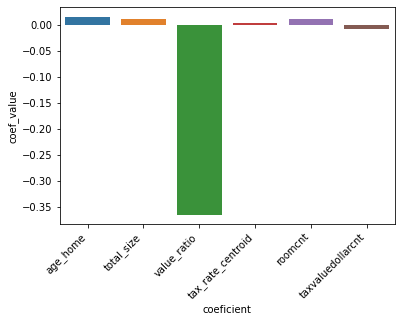

In [64]:
coef = pd.DataFrame({"coeficient": features, "coef_value":lm.coef_})
sns.barplot(data=coef, x="coeficient", y="coef_value")
plt.xticks(rotation=45, ha="right")


In [65]:
r_square = lm.score(train_scaled, y_train)

print(f'The r_square value is {r_square:.5f}')

The r_square value is 0.00113


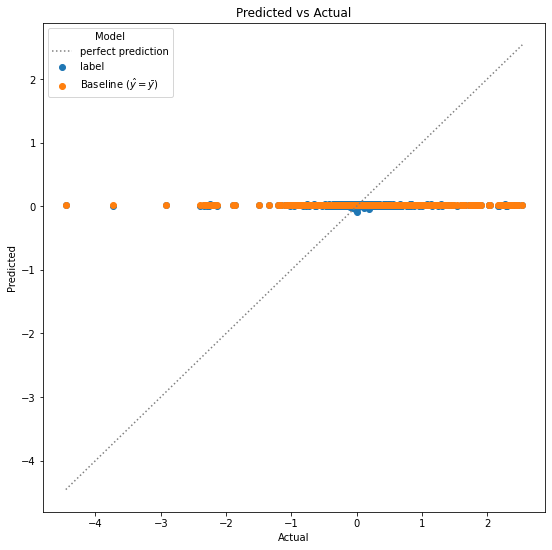

In [66]:
plt.figure(figsize=(9, 9))

plt.scatter(predictions.actual, predictions.linear_regression, label="label", marker='o')
plt.scatter(predictions.actual, predictions.baseline, label=r'Baseline ($\hat{y} = \bar{y}$)', marker='o')
plt.plot(
    [predictions.actual.min(), predictions.actual.max()],
    [predictions.actual.min(), predictions.actual.max()],
    ls=':',
    label='perfect prediction',
    c='grey'
)

plt.legend(title='Model')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predicted vs Actual')

plt.show()

In [67]:
# Is it overfit?

lm, y_pred = model.run_lm(train_scaled, y_train)
score = lm.score(train_scaled, y_train)
score_v = lm.score(validate_scaled, y_validate)

print(f'''
      
The difference in r-squared score between two models is {(score_v - score) / score:.2%}

This is indicative that the model is slightly overfit
      
''')


      
The difference in r-squared score between two models is -34.64%

This is indicative that the model is slightly overfit
      



# Random Forest Regression

In [68]:
features = ["age_home", "total_size", "value_ratio", "tax_rate_centroid", "roomcnt", "taxvaluedollarcnt"]
train_scaled, y_train, validate_scaled, y_validate, test_scaled, y_test = prepare.prepare_for_modeling(zillow, features)

In [69]:
for i in range(20):
    rf, y_pred = model.run_rf(train_scaled, y_train, i+1, 20)
    score = rf.score(train_scaled,y_train)
    score_v = rf.score(validate_scaled, y_validate)
    print(f'{i} = {score}, the val score = {score_v}')

0 = 0.10292995737921107, the val score = -1.1934952323415686
1 = 0.3894306175378005, the val score = -0.5050605858155033
2 = 0.488122228369963, the val score = -0.38380873748750033
3 = 0.531178335124808, the val score = -0.3146748974690954
4 = 0.5448399184508108, the val score = -0.2574981608225331
5 = 0.5669924372585482, the val score = -0.21422557011384802
6 = 0.5772743738278805, the val score = -0.17991429124255442
7 = 0.5788091493938844, the val score = -0.15187875017003072
8 = 0.5882784496110364, the val score = -0.14199012672398914
9 = 0.595652426387232, the val score = -0.12740636991564935
10 = 0.6079261724534639, the val score = -0.12131319911817595
11 = 0.6123310010311784, the val score = -0.11685869949321814
12 = 0.6202936333918794, the val score = -0.11376726125823278
13 = 0.6253295359129938, the val score = -0.11281622478246134
14 = 0.6288951005993791, the val score = -0.10517163372131111
15 = 0.6336924638382603, the val score = -0.098931203890682
16 = 0.6295275634271442, t

In [70]:
rf, y_pred = model.run_rf(train_scaled, y_train, 2, 20)
predictions["random_forest"] = y_pred

In [71]:
from math import sqrt
mse = sklearn.metrics.mean_squared_error(y_train, y_pred)
rmse = sqrt(mse)
rmse
r_2 = explained_variance_score(y_train,y_pred)

In [72]:
# Validate

y_pred = rf.predict(validate_scaled)

mse = sklearn.metrics.mean_squared_error(y_validate, y_pred)
rmse = sqrt(mse)
rmse
r_2 = explained_variance_score(y_validate,y_pred)

r_2

-0.5049308825855345

In [73]:
r_square = rf.score(train_scaled, y_train)

print(f'The r_square value is {r_square:.5f}')

The r_square value is 0.38943


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

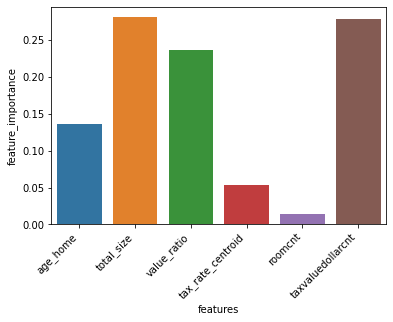

In [74]:
feature_importance = pd.DataFrame({"features": features, "feature_importance": rf.feature_importances_})

sns.barplot(data=feature_importance, x="features", y="feature_importance")
plt.xticks(rotation = 45, ha="right")

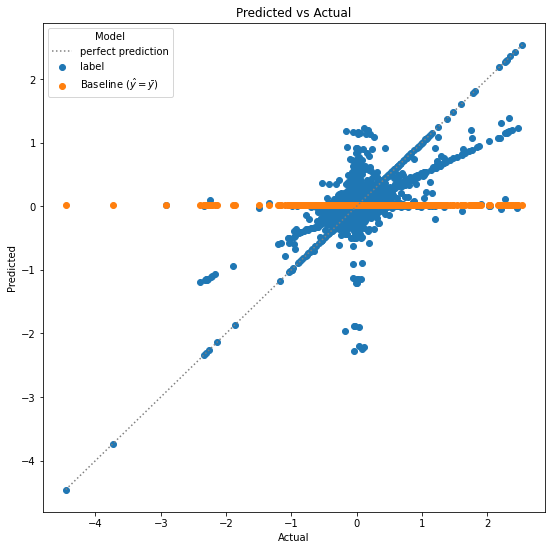

In [75]:
plt.figure(figsize=(9, 9))

plt.scatter(predictions.actual, predictions.random_forest, label="label", marker='o')
plt.scatter(predictions.actual, predictions.baseline, label=r'Baseline ($\hat{y} = \bar{y}$)', marker='o')
plt.plot(
    [predictions.actual.min(), predictions.actual.max()],
    [predictions.actual.min(), predictions.actual.max()],
    ls=':',
    label='perfect prediction',
    c='grey'
)

plt.legend(title='Model')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predicted vs Actual')

plt.show()

In [76]:
# Evaluate

predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))

actual               0.000000
baseline             0.024951
linear_regression    0.024923
random_forest        0.015234
dtype: float64

As we can see - the linear_regression model only performs slightly better than the baseline. The random forest performs better, but what this tells me is that the the baseline is likely to be really good overall, because the Zestimate is really good in general. However, because we found that there is a negative r-squared when looking at the validate, this actually tells us that the model is not good. 

You might be asking how it is possible to have a negative r-squared, and the answer that I found is that it is likely due to the fact that the model is performing so poorly, that the model is not being fitted on a horizontal line. 

Bottom line: This means that in this case it is likely better to just use the baseline or anther model.

# Modeling Phase II 

Do separe models, using the linear_regression model, for each county

### LA Model

In [77]:
county = "Los Angeles"
features = ["age_home", "total_size", "value_ratio", "tax_rate_centroid", "roomcnt", "taxvaluedollarcnt"]
train_scaled, y_train, validate_scaled, y_validate, test_scaled, y_test = prepare.prepare_for_modeling_county(zillow,county, features)

In [78]:
predictions_LA = pd.DataFrame({"actual": y_train, "baseline": y_train.mean()}) # beacuse logerror is evenly distributed, we can use the mean as the baseline


In [79]:
lm, y_pred = model.run_lm(train_scaled, y_train)
predictions_LA["linear_regression_LA"] = y_pred


In [80]:
# Evaluate

predictions_LA.apply(lambda col: sklearn.metrics.mean_squared_error(predictions_LA.actual, col))

actual                  0.00000
baseline                0.02349
linear_regression_LA    0.02344
dtype: float64

### Orange County

In [81]:
county = "Orange County"
features = ["age_home", "total_size", "value_ratio", "tax_rate_centroid", "roomcnt", "taxvaluedollarcnt"]
train_scaled, y_train, validate_scaled, y_validate, test_scaled, y_test = prepare.prepare_for_modeling_county(zillow,county, features)

In [82]:
predictions_OC = pd.DataFrame({"actual": y_train, "baseline": y_train.mean()}) # beacuse logerror is evenly distributed, we can use the mean as the baseline

In [83]:
lm, y_pred = model.run_lm(train_scaled, y_train)
predictions_OC["linear_regression_OC"] = y_pred

In [84]:
# Evaluate
predictions_OC.apply(lambda col: sklearn.metrics.mean_squared_error(predictions_OC.actual, col))

actual                  0.000000
baseline                0.030607
linear_regression_OC    0.030447
dtype: float64

### Ventura County

In [85]:
county = "Ventura County"
features = ["age_home", "total_size", "value_ratio", "tax_rate_centroid", "roomcnt", "taxvaluedollarcnt"]
train_scaled, y_train, validate_scaled, y_validate, test_scaled, y_test = prepare.prepare_for_modeling_county(zillow,county, features)

In [86]:
predictions_VC = pd.DataFrame({"actual": y_train, "baseline": y_train.mean()}) # beacuse logerror is evenly distributed, we can use the mean as the baseline

In [87]:
lm, y_pred = model.run_lm(train_scaled, y_train)
predictions_VC["linear_regression_VC"] = y_pred

In [88]:
# Evaluate

predictions_VC.apply(lambda col: sklearn.metrics.mean_squared_error(predictions_VC.actual, col))

actual                  0.000000
baseline                0.023135
linear_regression_VC    0.023113
dtype: float64

### Combine all feartures and see if it performed better

In [89]:
values = pd.concat([predictions_LA, predictions_OC, predictions_VC])
values["composite_model"] = np.nan
values.composite_model = values.composite_model.fillna(values.linear_regression_LA).fillna(values.linear_regression_VC).fillna(values.linear_regression_OC)

In [90]:
values = values.drop(columns=["linear_regression_LA", "linear_regression_OC", "linear_regression_VC"])

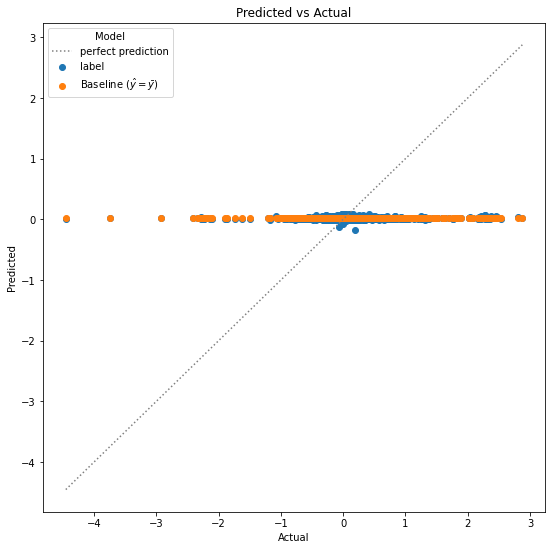

In [91]:
plt.figure(figsize=(9, 9))

plt.scatter(values.actual, values.composite_model, label="label", marker='o')
plt.scatter(values.actual, values.baseline, label=r'Baseline ($\hat{y} = \bar{y}$)', marker='o')
plt.plot(
    [values.actual.min(), values.actual.max()],
    [values.actual.min(), values.actual.max()],
    ls=':',
    label='perfect prediction',
    c='grey'
)

plt.legend(title='Model')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predicted vs Actual')

plt.show()

In [92]:
mse_comb = values.apply(lambda col: sklearn.metrics.mean_squared_error(values.actual, col))
mse_comb

actual             0.000000
baseline           0.025555
composite_model    0.025475
dtype: float64

In [93]:
mse = predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))
mse.loc["composite_model"] = mse_comb.composite_model

In [107]:
mse

actual               0.000000
baseline             0.024951
linear_regression    0.024923
random_forest        0.015234
composite_model      0.025475
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

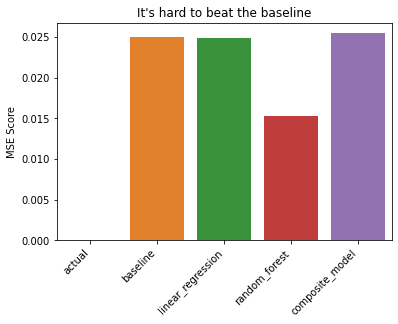

In [109]:
sns.barplot(x=mse.index, y=mse.values)
plt.xticks(rotation=45, ha="right")
plt.title("It's hard to beat the baseline")
plt.ylabel("MSE Score")
plt.show

# Test

We see from the graph that our first linear regression model barely outperforms the baseline. As such, we will select it as our best model, and run it agains the test dataset, to ensure that it is not over fit.

In [115]:
features = ["age_home", "total_size", "value_ratio", "tax_rate_centroid", "roomcnt", "taxvaluedollarcnt"]
train_scaled, y_train, validate_scaled, y_validate, test_scaled, y_test = prepare.prepare_for_modeling(zillow, features)
lm, y_pred = model.run_lm(train_scaled, y_train)
score = lm.score(train_scaled, y_train)
score_v = lm.score(test_scaled, y_test)

print(f'''
      
The difference in r-squared score between two models is {(score_v - score):.5f}

This is indicative that the model is not overfit
      
''')


      
The difference in r-squared score between two models is 0.00263

This is indicative that the model is not overfit
      



# Conclusion

After sereral model - we see actually that the best perfroming model is the linear_regression model. It is surprising, considering that it doesn't perform much better than the baseline. In fact, for this case, I would recommend using the baseline over any of the other models, just because of the computation work is does not provide a significantly higher pay-off.

### Key-takeaway ... Zillow's model is very good at what it does